In [94]:
import numpy as np
import healpy as hp
import healpy.rotator as hpr
import healpy.pixelfunc as hpf
import healpy.visufunc as hpv
import astropy as ap
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
 
# NSIDE=32
# m=np.arange(hp.nside2npix(NSIDE))
# print m.shape, m[0:10], m[m.shape[0]-10:m.shape[0]]
# hp.mollview(m, title="Test")

In [2]:
from HERA_MapMaking_VisibilitySimulation import DATA_PATH
print (DATA_PATH)

pyuvdata: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation
version_file: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/VERSION
version: 1.0.0
Exception: git_version.
Programme Starts at: 2018-07-06 16:23:10.856634
/Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data


In [4]:
outfile_GSM_name = DATA_PATH + '/Results_Fits_w-Data-CG-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-150.73-gW-0.048978-150.7324MHz-dipole-nubl990-nt1530-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N-774.44.fits'
map_1 = fits.getdata(outfile_GSM_name).squeeze()

Filename: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data/Results_Fits_w-Data-CG-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-150.73-gW-0.048978-150.7324MHz-dipole-nubl990-nt1530-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N-774.44.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (12288,)   float64   
Data shape, min, max:  (12288,) -139.58774575294163 1084.8540418213663


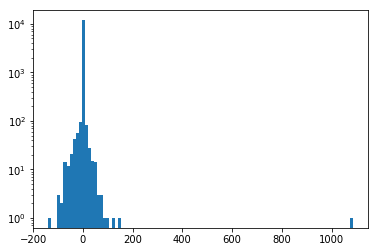

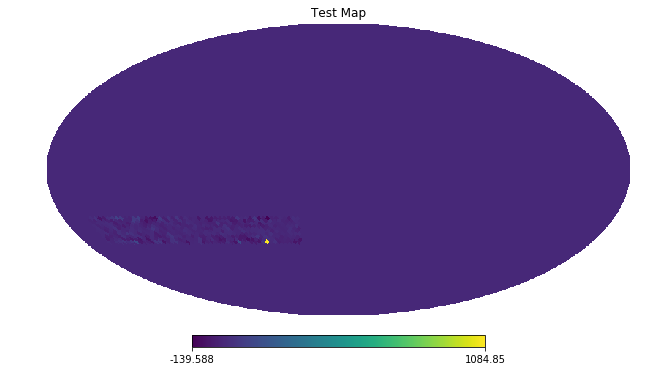

In [14]:
# hdul = fits.open('test.fits')
hdul = fits.open(outfile_GSM_name)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata(outfile_GSM_name)
plt.hist(testmap,bins=100, log=True)
hp.mollview(testmap, nest=True, title="Test Map")

80.0 160.0 -46.1880215352 46.1880215352
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


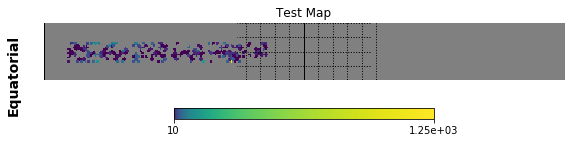

In [10]:
hp.cartview(testmap, title="Test Map", norm='log', min=10, max=1250, coord='C', latra=[-50,-10],xsize=360, nest=True)
hp.graticule(dpar=10,dmer=10)

In [37]:
filenames_32 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [35]:
filenames_64 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [48]:
filenames_32_321 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [47]:
filenames_64_321 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [49]:
filenames_32_321[0].split('/')[-1]

'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1041-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits'

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1578-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map32-wholeday without Fornax A: 68.9714160121
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt1341-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map32-wholeday without Fornax A: 88.2799794902
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt1559-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map32-wholeday without Fornax A: 37.4454265654
(3, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-139.79-gW-0.048978-139.7949MHz-dipole-nubl

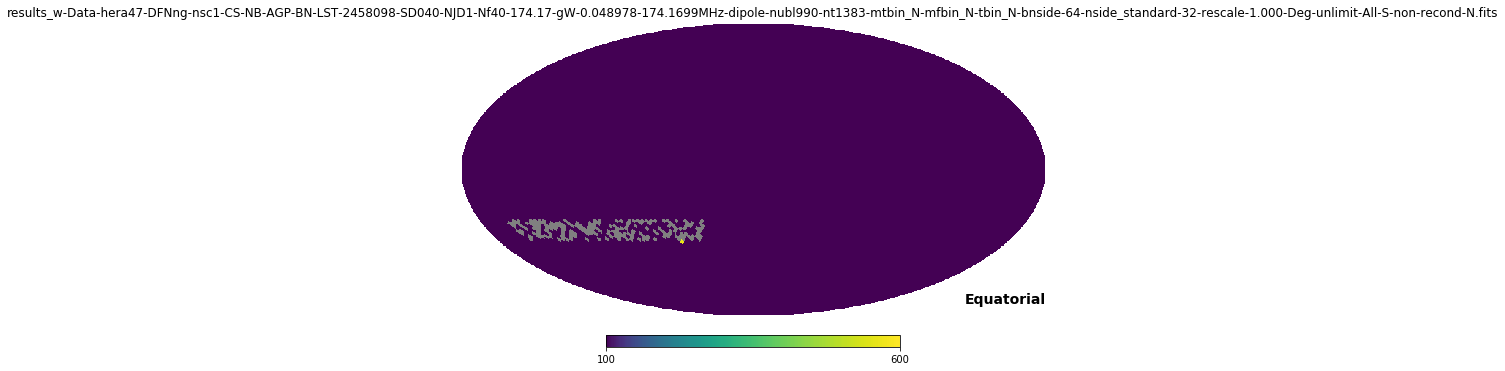

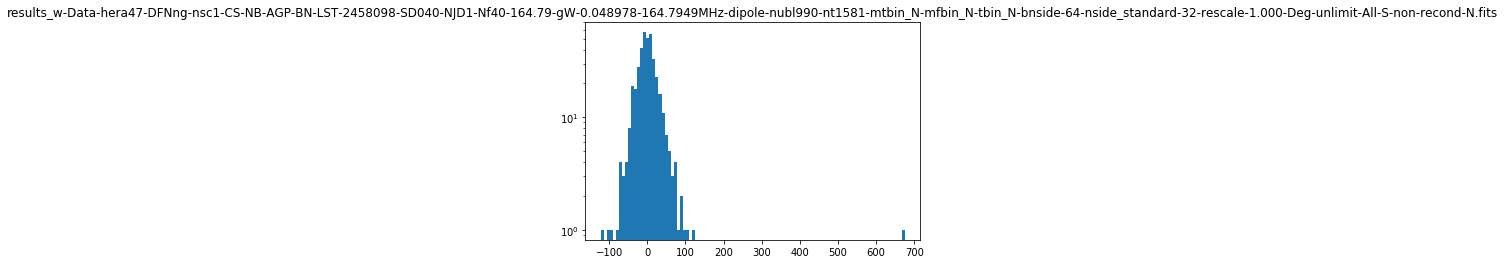

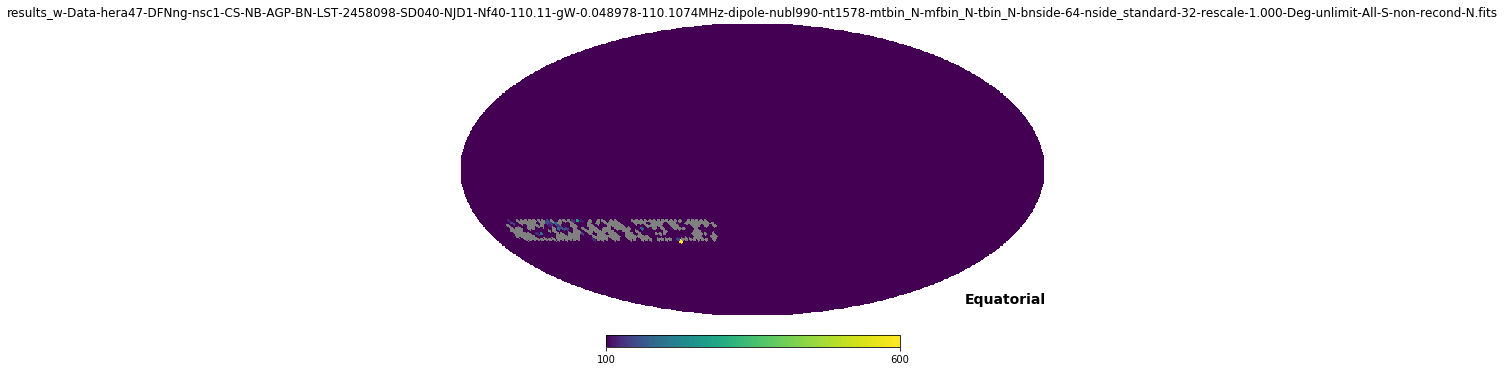

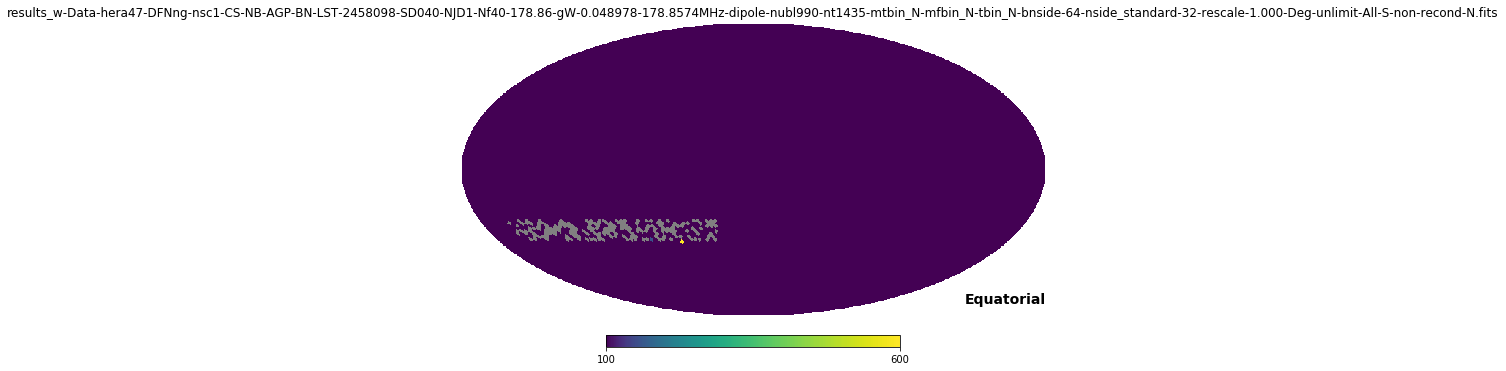

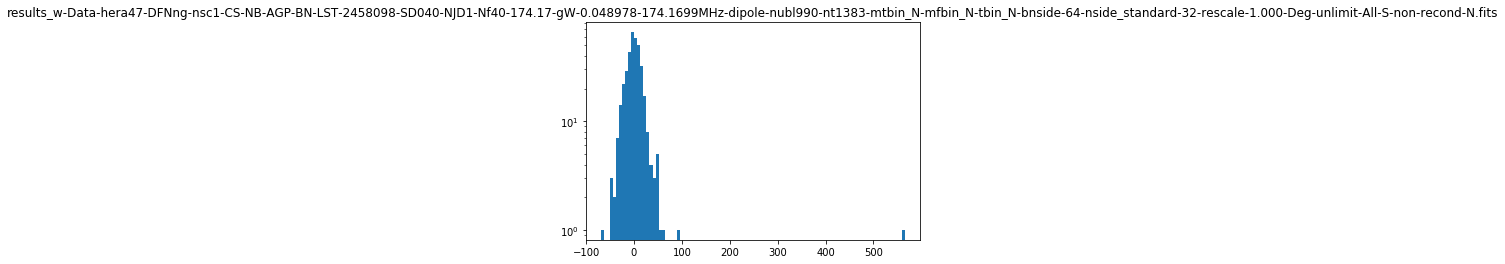

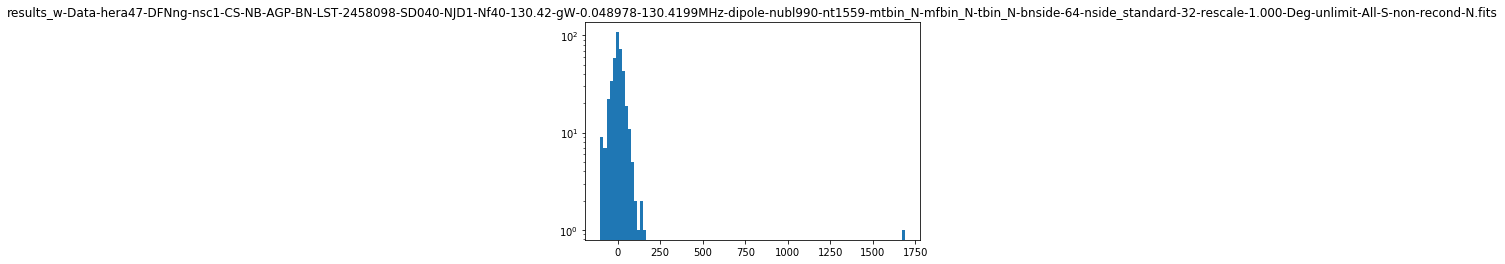

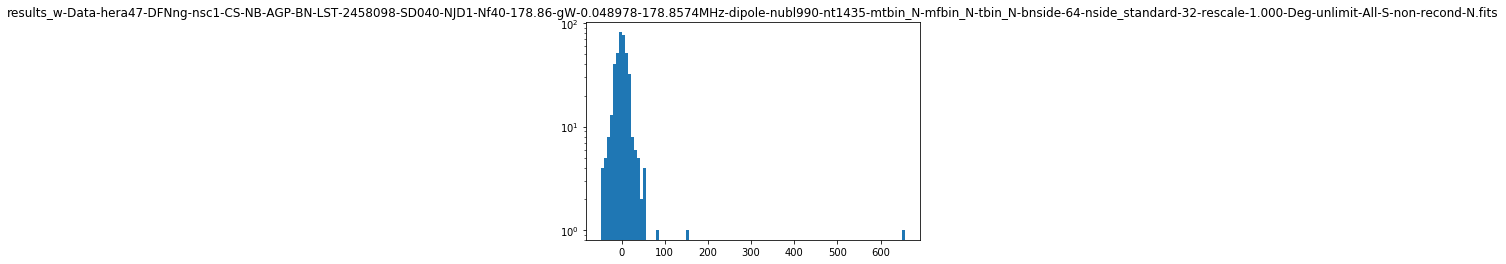

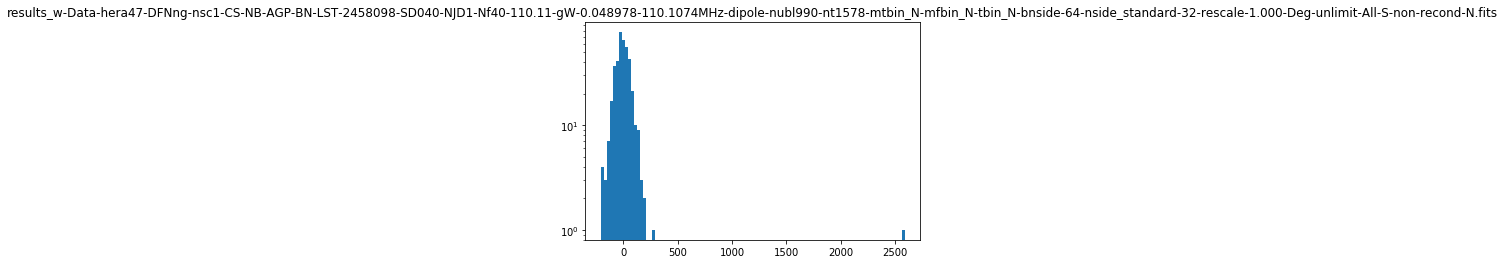

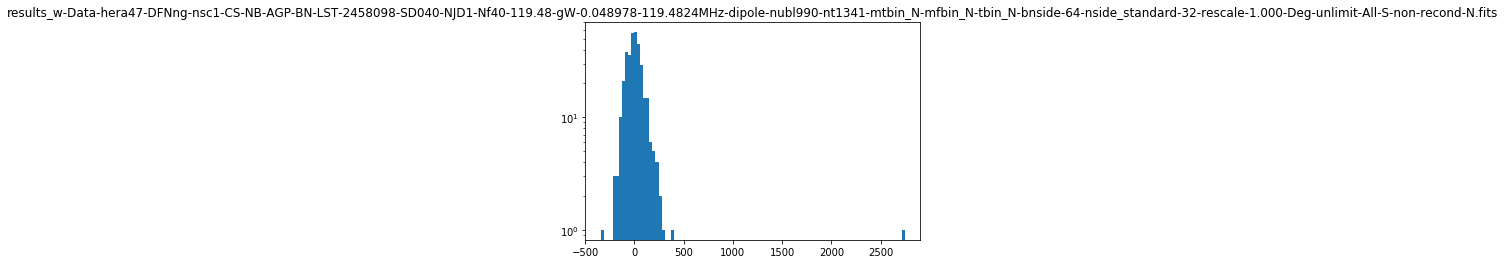

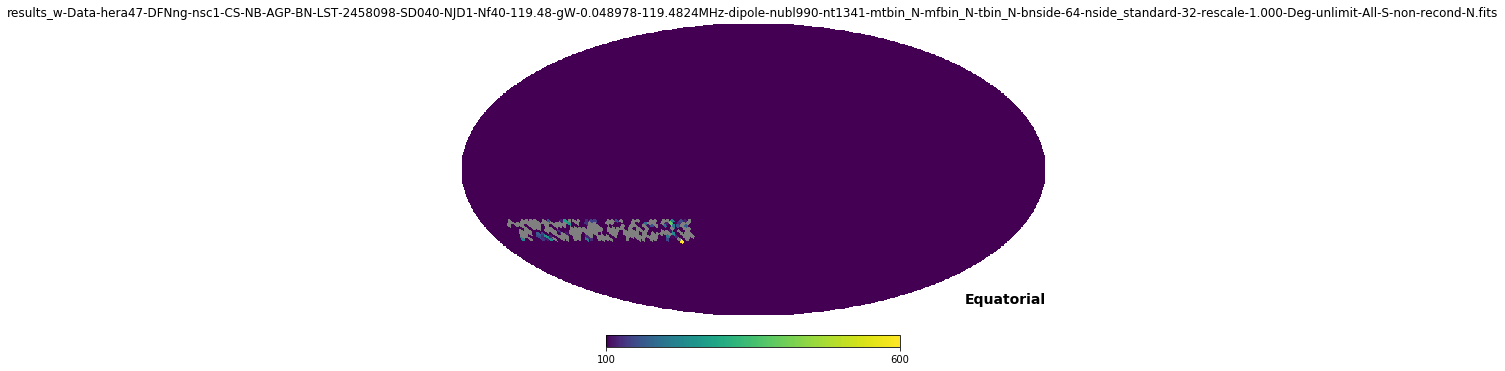

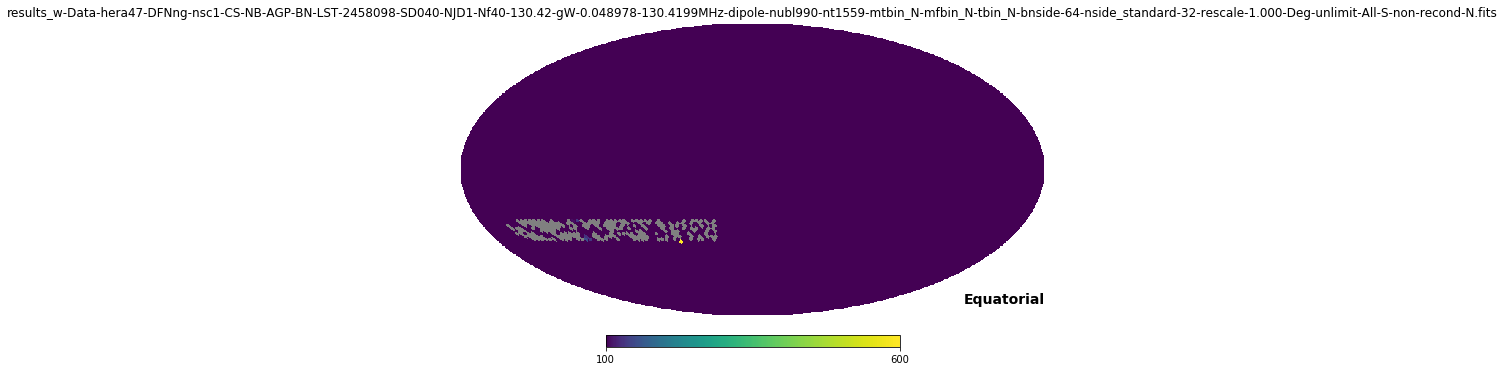

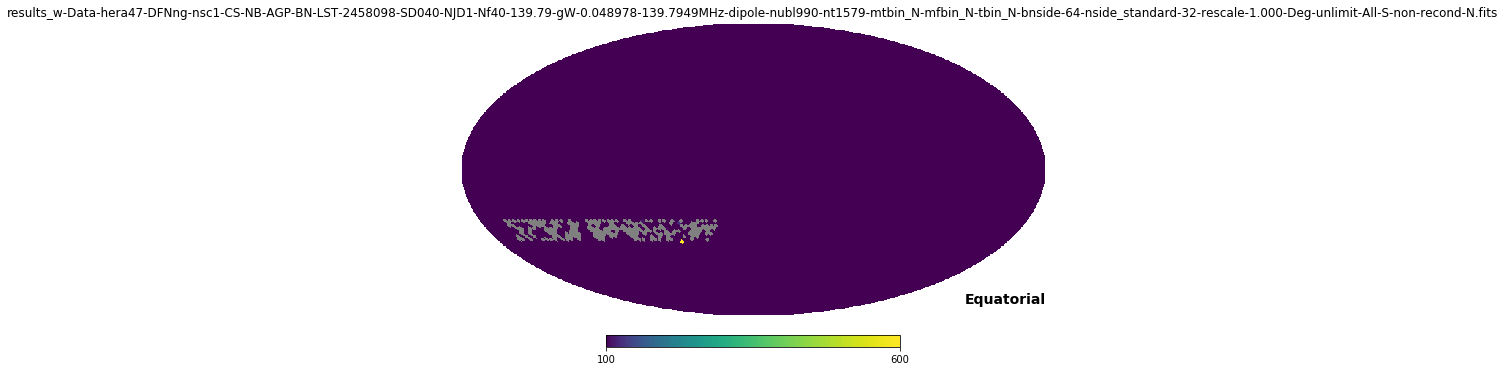

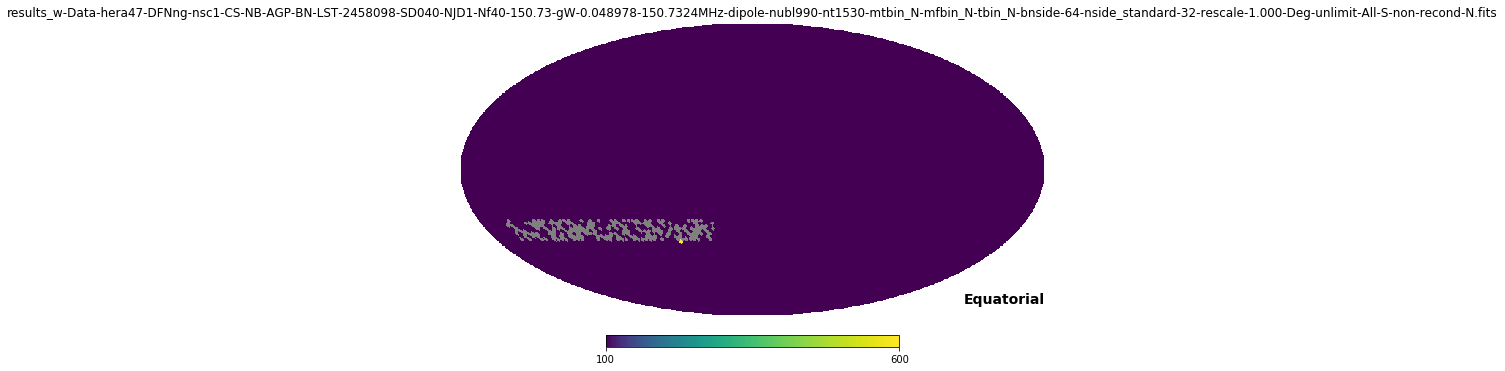

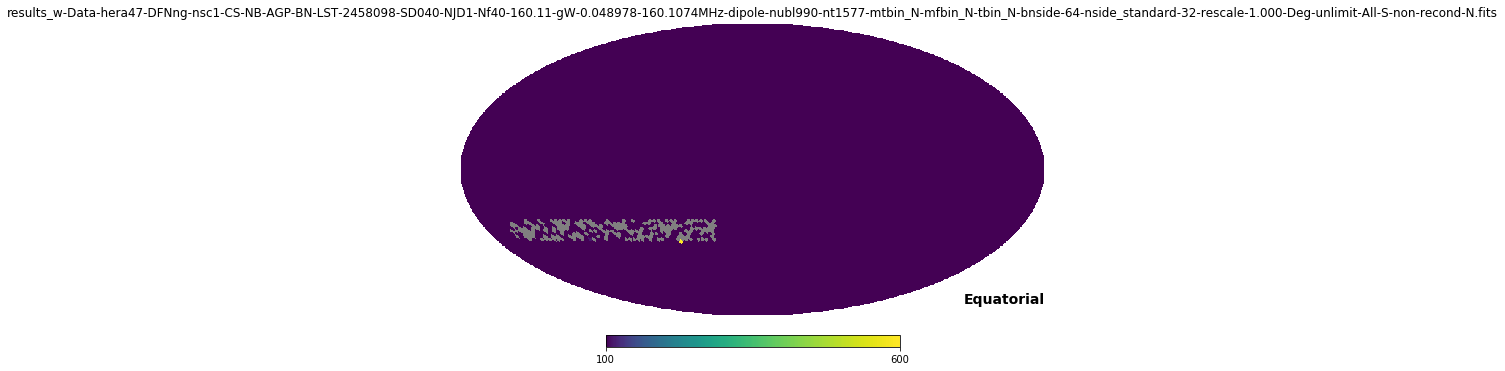

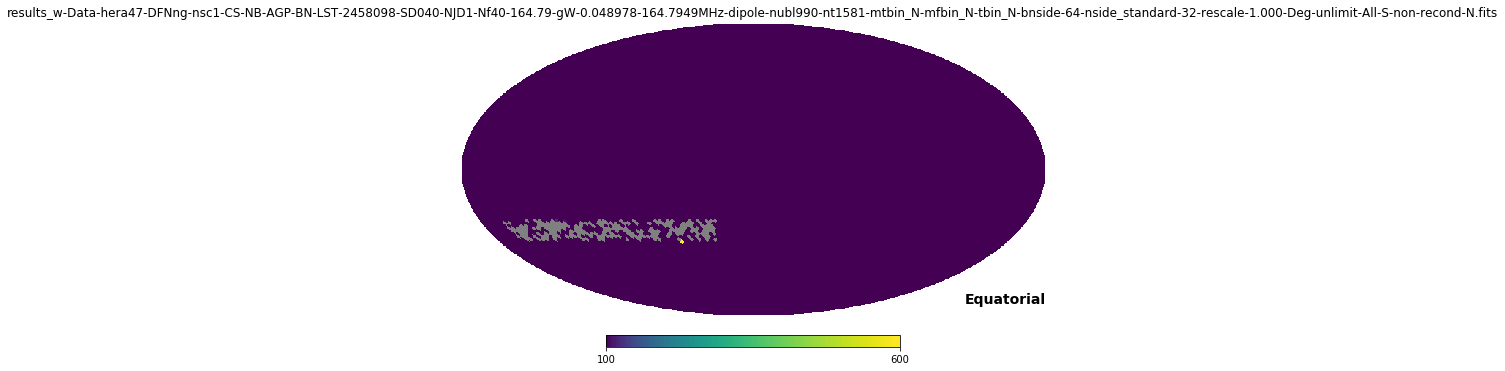

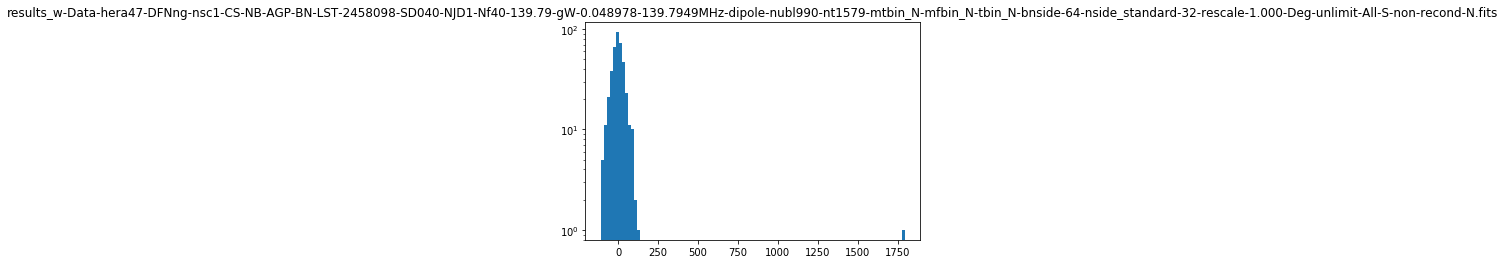

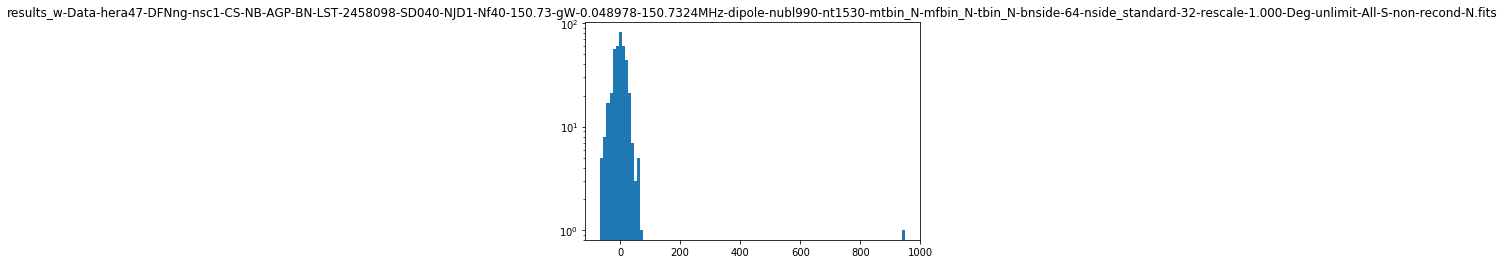

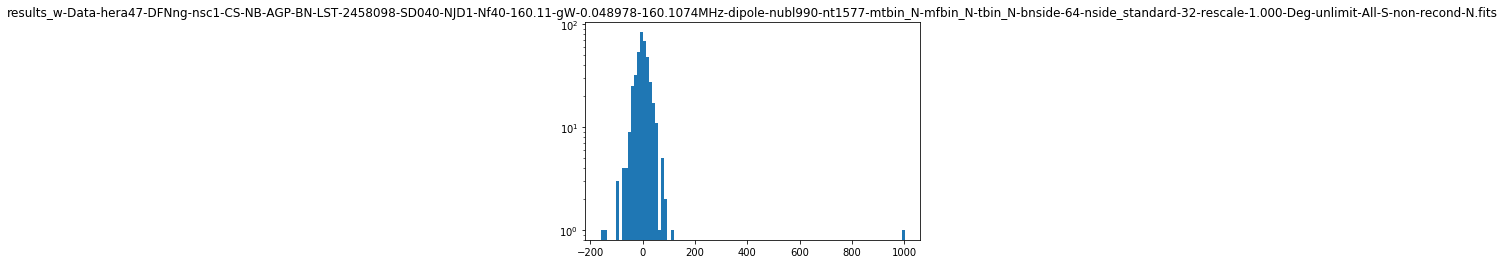

In [89]:
for id_file, fitfile in enumerate(filenames_32):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('STD of the Map32-wholeday without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)])))
    plt.figure(10000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(50000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()
    

In [141]:
nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_whole_32 = fits.getdata(filenames_32[8]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_whole_32)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_whole_32)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_whole_32[np.argsort(ww_solution_whole_32)[-40:]]))




Bright_Pixels_Data: [[-27.27961274 -32.7971683  -25.94447977 -28.63098984 -31.38816646
  -31.38816646 -31.38816646 -28.63098984 -27.27961274 -32.7971683
  -27.27961274 -25.94447977 -28.63098984 -31.38816646 -27.27961274
  -28.63098984 -34.22886633 -25.94447977 -28.63098984 -25.94447977
  -31.38816646 -32.7971683  -28.63098984 -32.7971683  -30.
  -30.         -31.38816646 -28.63098984 -32.7971683  -35.68533471
  -25.94447977 -30.         -27.27961274 -34.22886633 -32.7971683
  -25.94447977 -30.         -34.22886633 -27.27961274 -31.38816646
  -35.68533471 -32.7971683  -28.63098984 -35.68533471 -34.22886633
  -32.7971683  -31.38816646 -27.27961274 -25.94447977 -35.68533471
  -28.63098984 -28.63098984 -27.27961274 -30.         -32.7971683
  -28.63098984 -31.38816646 -25.94447977 -31.38816646 -34.22886633
  -30.         -25.94447977 -28.63098984 -32.7971683  -35.68533471
  -27.27961274 -34.22886633 -34.22886633 -27.27961274 -34.22886633
  -34.22886633 -34.22886633 -27.27961274 -35.68533471

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1578-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map64-wholeday without Fornax A: 882.208780813
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt1341-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map64-wholeday without Fornax A: 1253.60607848
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt1559-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map64-wholeday without Fornax A: 693.744862078
(3, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-139.79-gW-0.048978-139.7949MHz-dipole-nubl

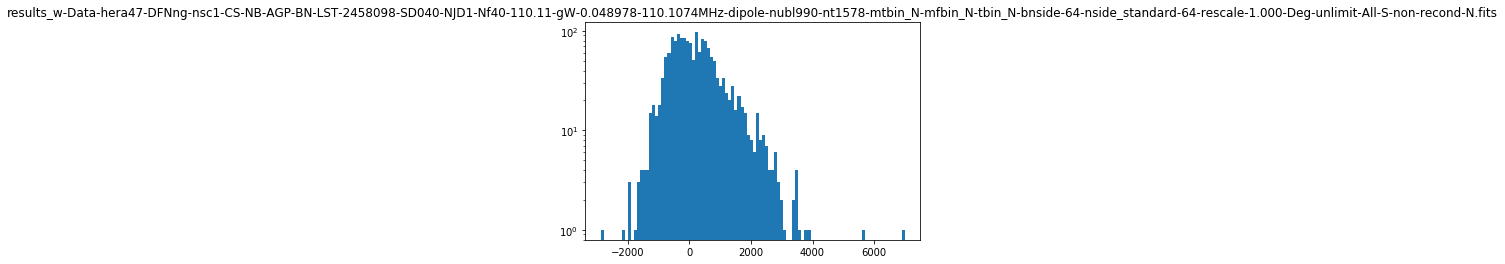

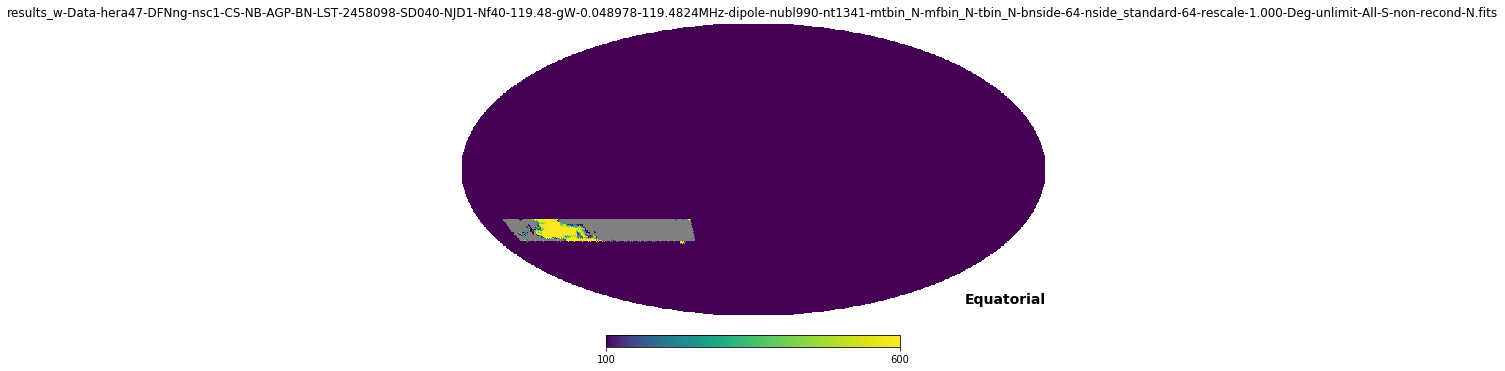

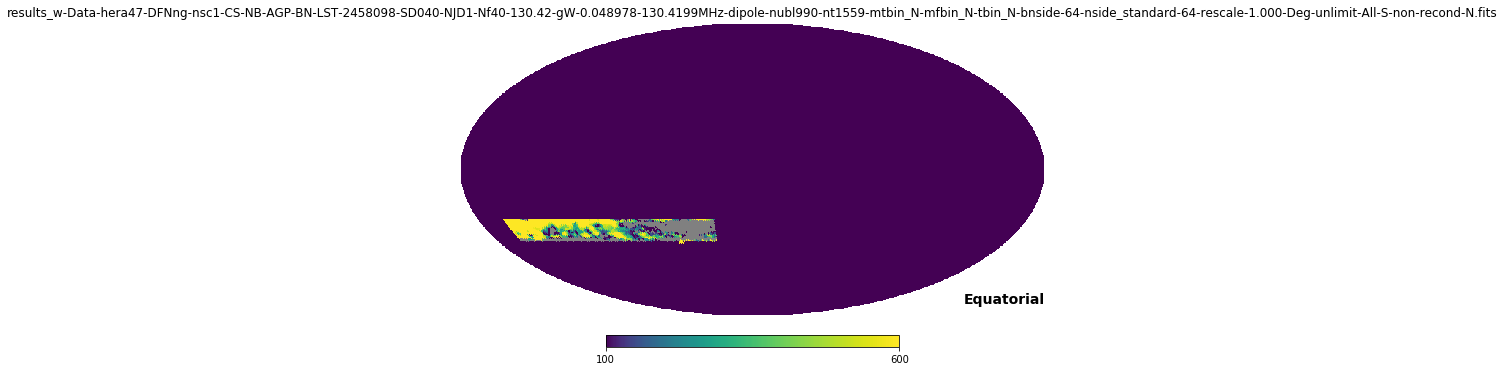

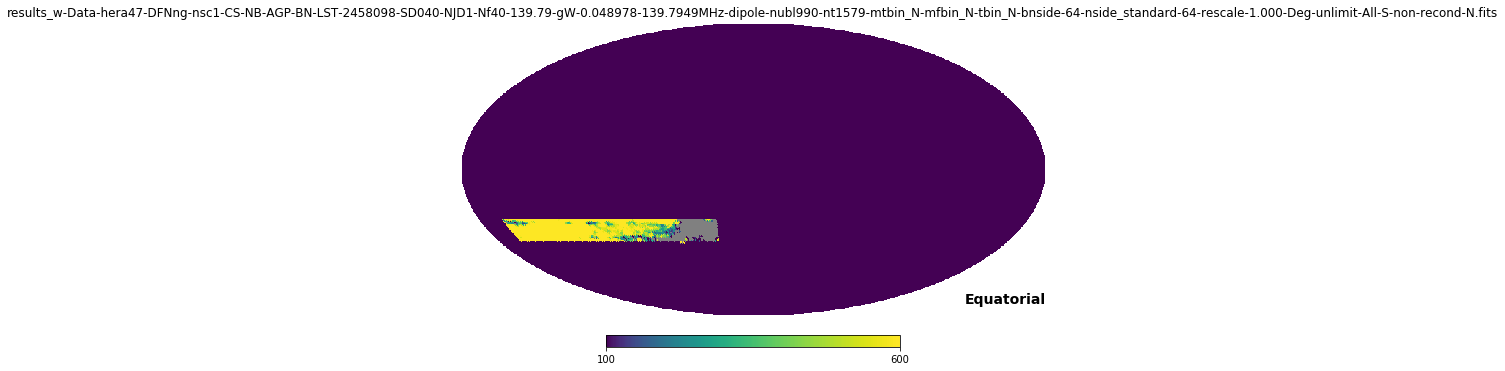

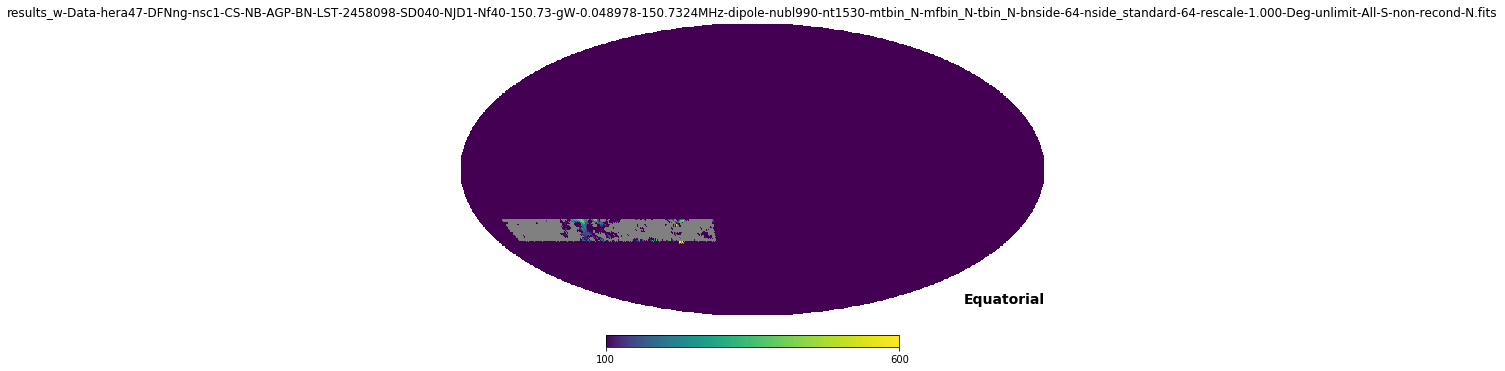

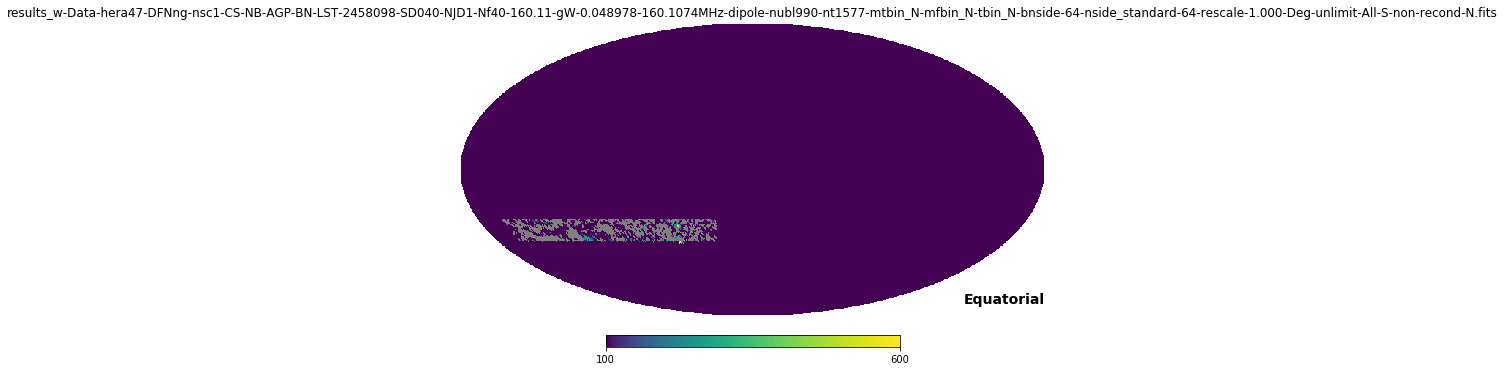

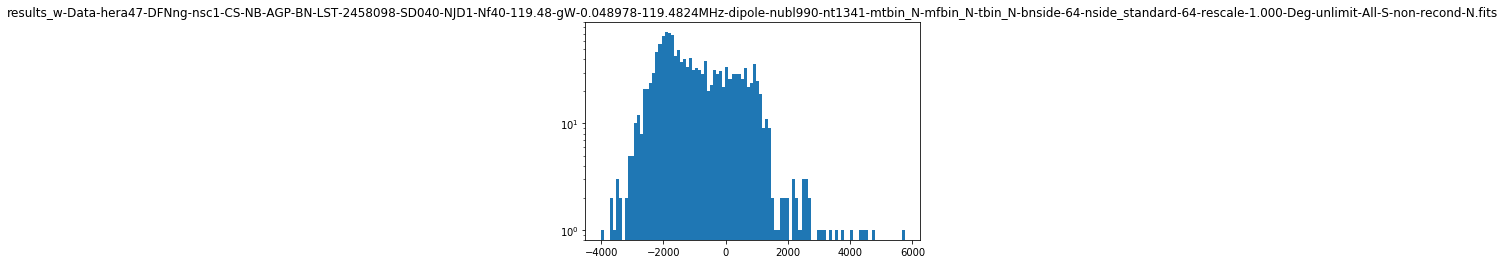

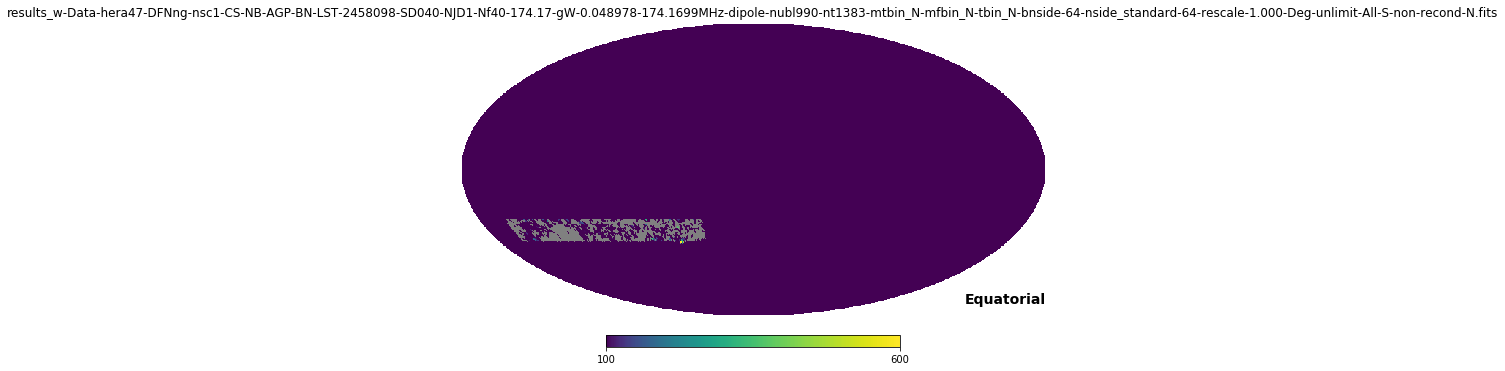

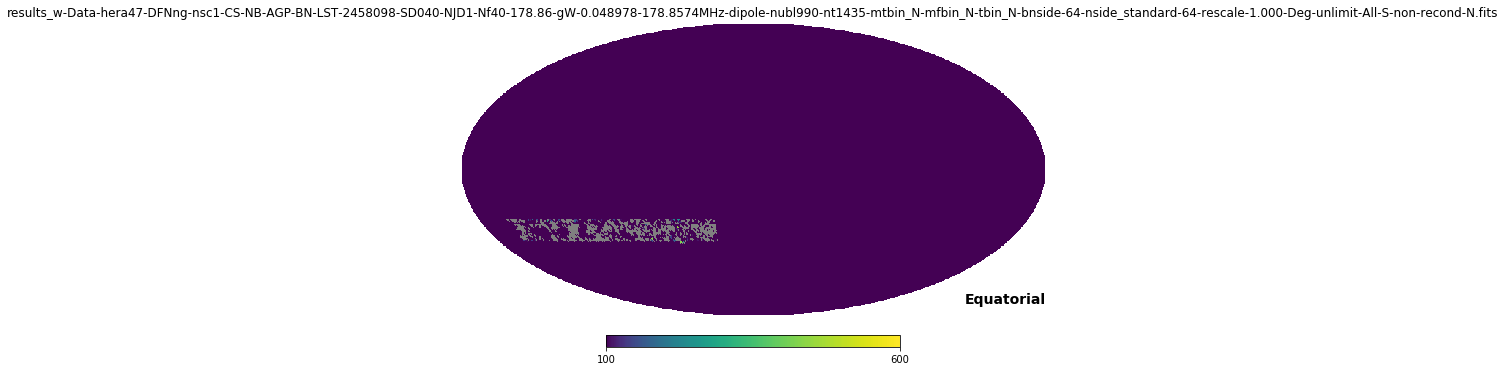

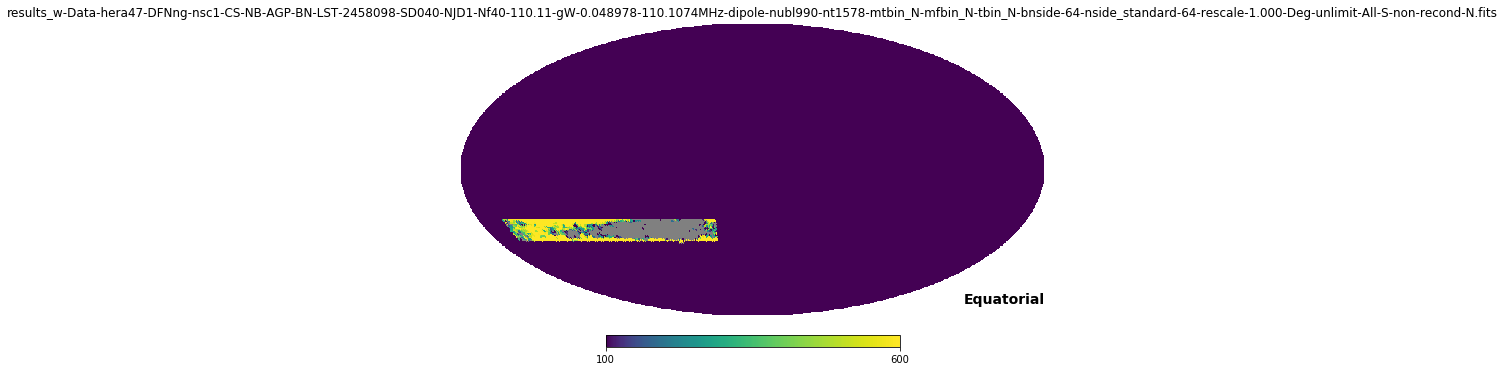

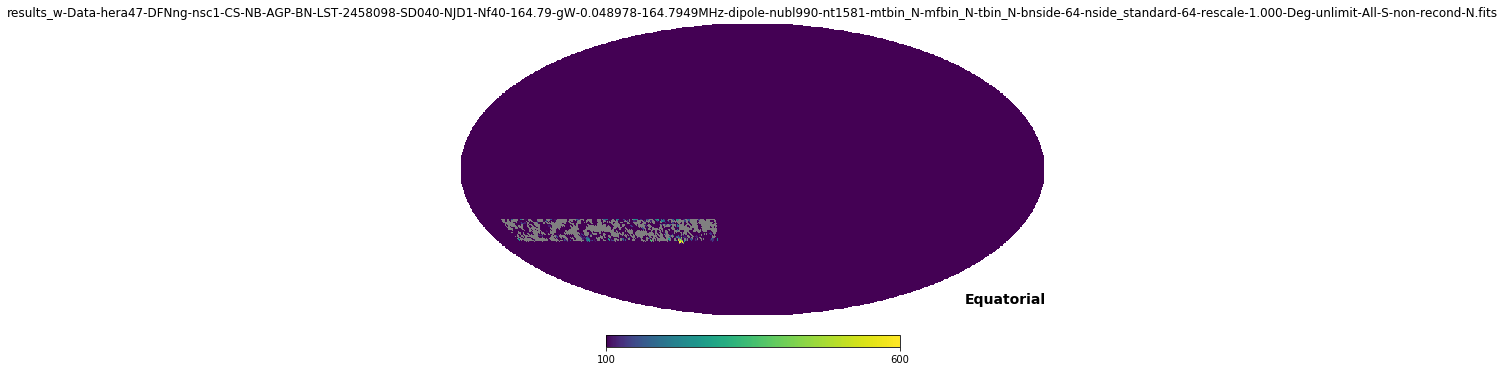

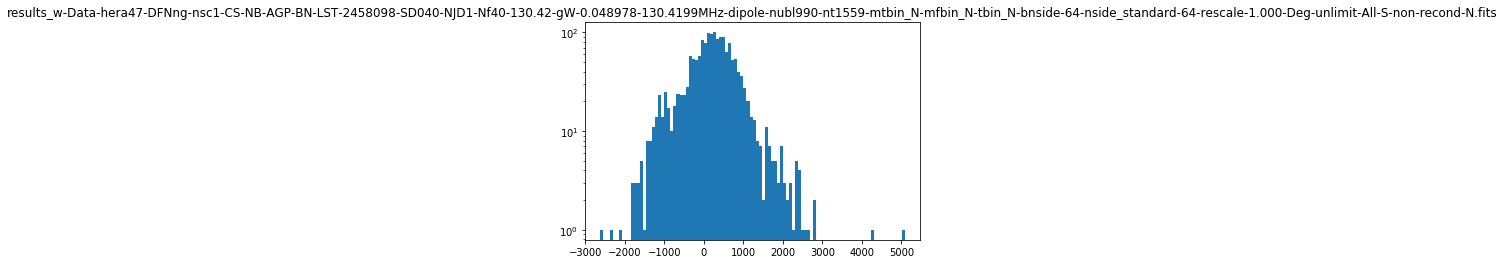

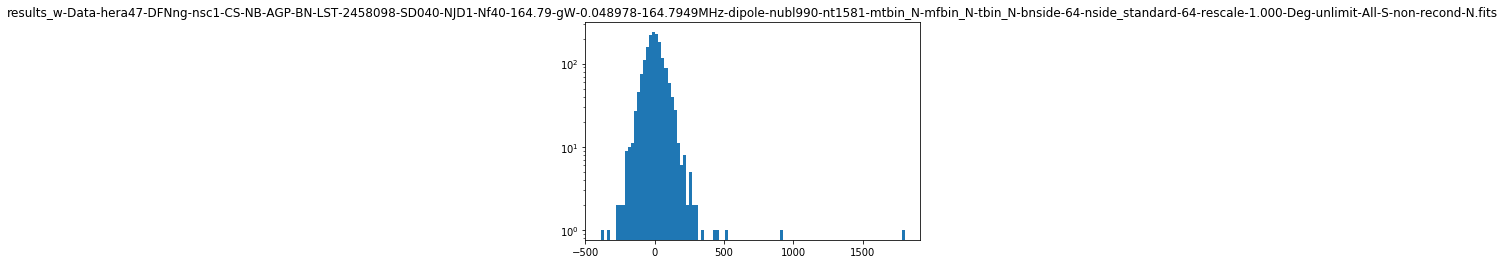

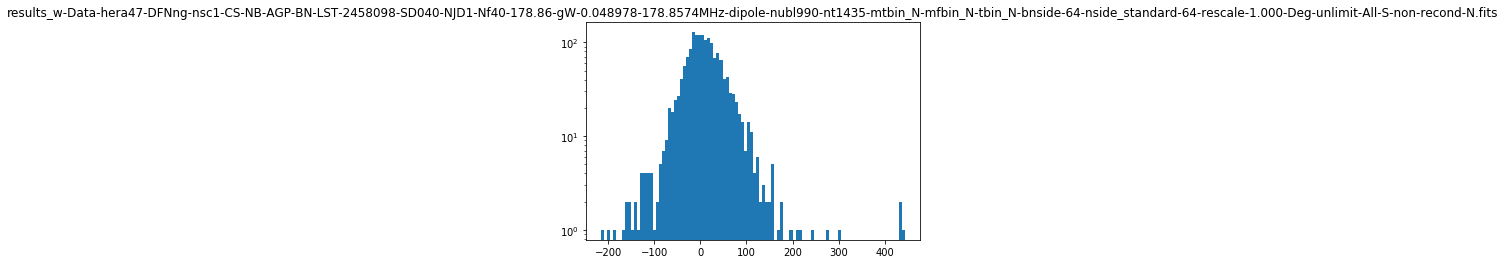

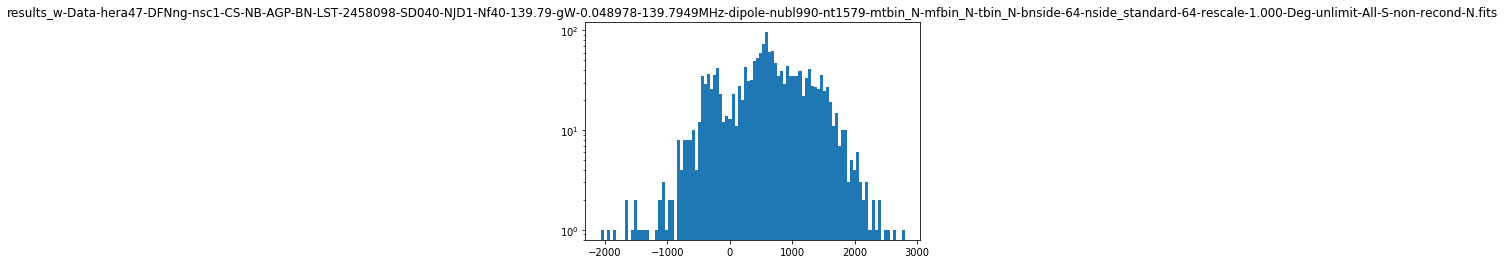

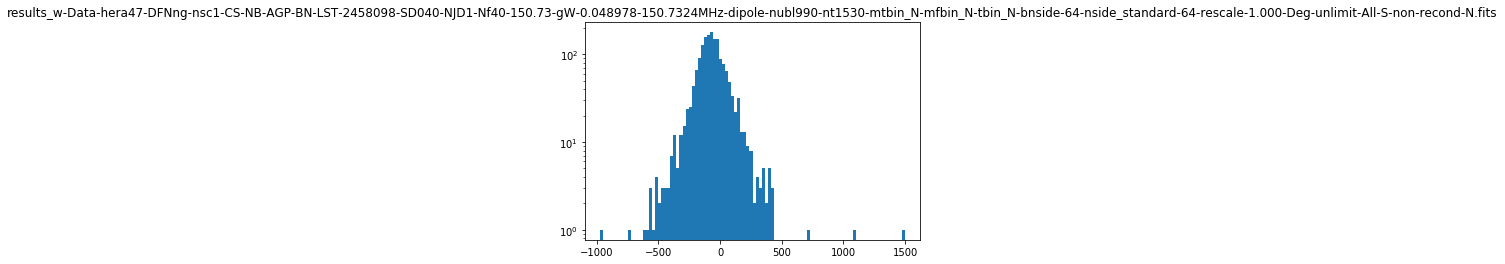

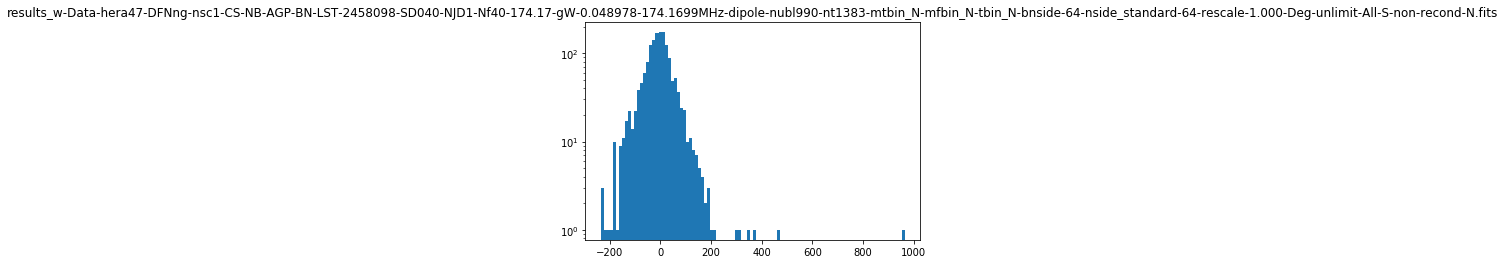

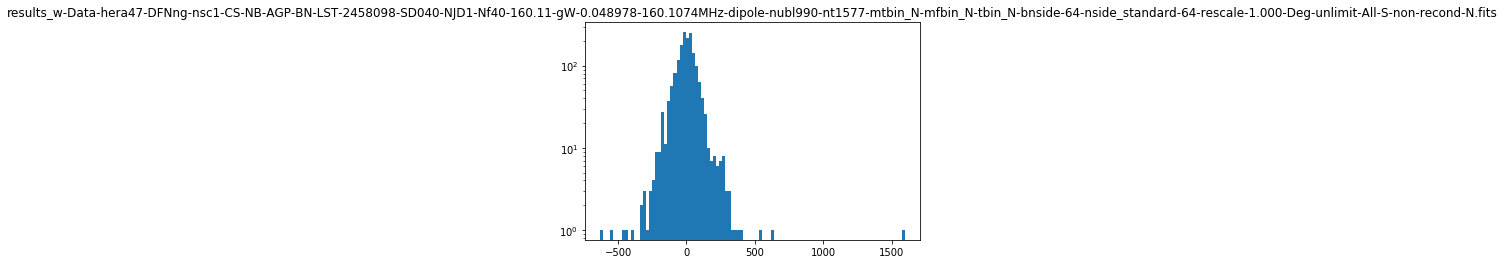

In [90]:
for id_file, fitfile in enumerate(filenames_64):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('STD of the Map64-wholeday without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-2]][np.abs(map_fit[np.argsort(map_fit)[:-2]]) > 10**(-5)])))
    plt.figure(100000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(500000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

In [132]:
nside_standard = 64
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_whole_64 = fits.getdata(filenames_64[4]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_whole_64)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_whole_64)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_whole_64[np.argsort(ww_solution_whole_64)[-80:]]))

Bright_Pixels_Data: [[-36.42357364 -34.22886633 -35.68533471 -26.61009781 -30.
  -36.42357364 -25.28260304 -28.63098984 -34.22886633 -33.51005607
  -33.51005607 -25.28260304 -36.42357364 -36.42357364 -26.61009781
  -32.7971683  -33.51005607 -30.         -25.94447977 -34.22886633
  -33.51005607 -26.61009781 -32.7971683  -32.08995126 -27.95318688
  -36.42357364 -25.94447977 -29.31319896 -25.28260304 -32.08995126
  -31.38816646 -32.08995126 -35.68533471 -25.28260304 -25.28260304
  -35.68533471 -27.95318688 -27.27961274 -25.28260304 -32.7971683
  -30.69158768 -35.68533471 -32.7971683  -25.94447977 -36.42357364
  -26.61009781 -27.27961274 -33.51005607 -32.7971683  -27.95318688
  -26.61009781 -27.27961274 -32.7971683  -26.61009781 -30.69158768
  -27.27961274 -30.         -25.94447977 -26.61009781 -36.42357364
  -25.94447977 -36.42357364 -34.95386526 -36.42357364 -25.94447977
  -28.63098984 -31.38816646 -33.51005607 -25.28260304 -25.28260304
  -36.42357364 -26.61009781 -27.95318688 -26.610097

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1041-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map32-part without Fornax A: 51.3984160812
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt803-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map32-part without Fornax A: 72.6326436825
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt1031-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map32-part without Fornax A: 30.7403869304
(3, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-139.79-gW-0.048978-139.7949MHz-dipole-nubl990-nt1038-mt

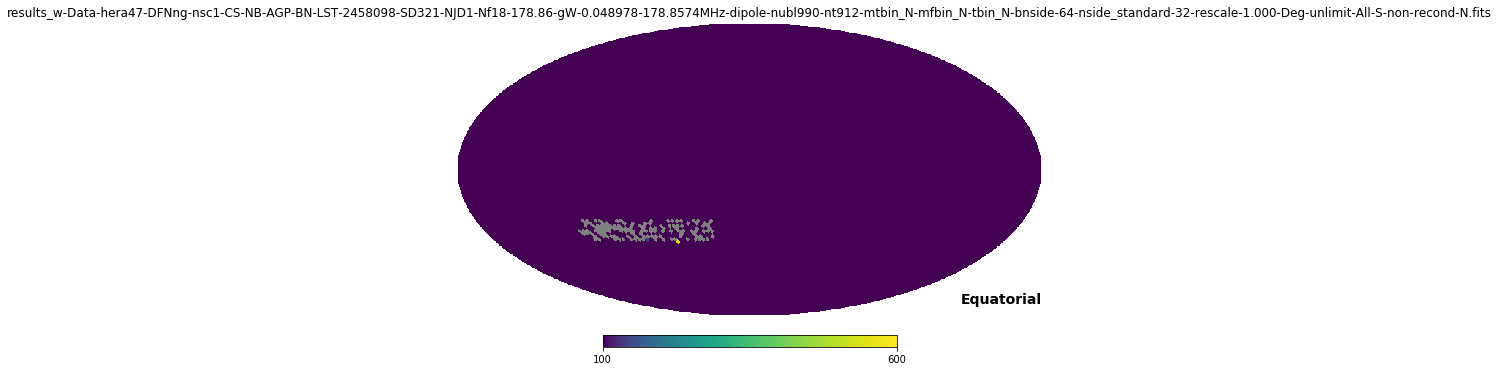

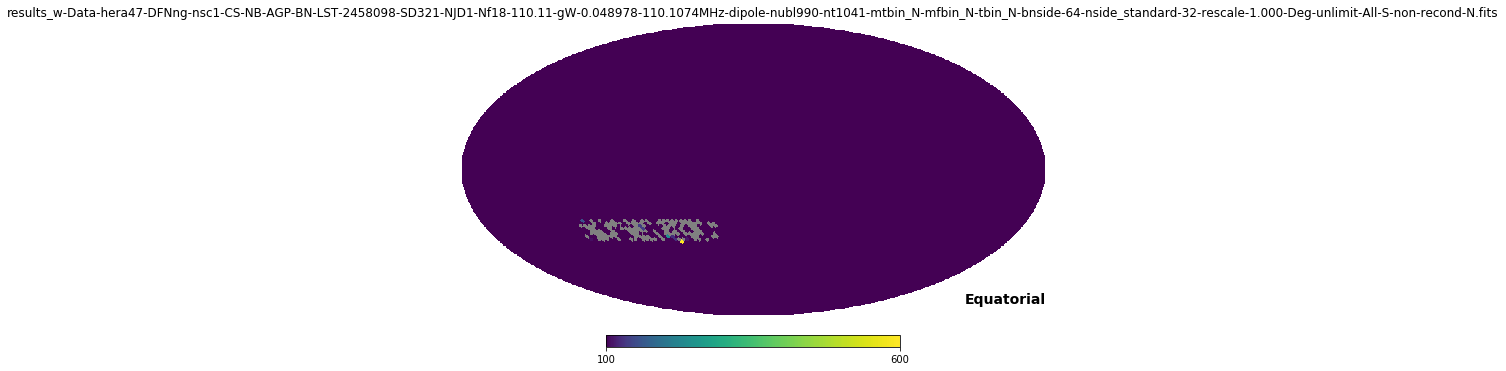

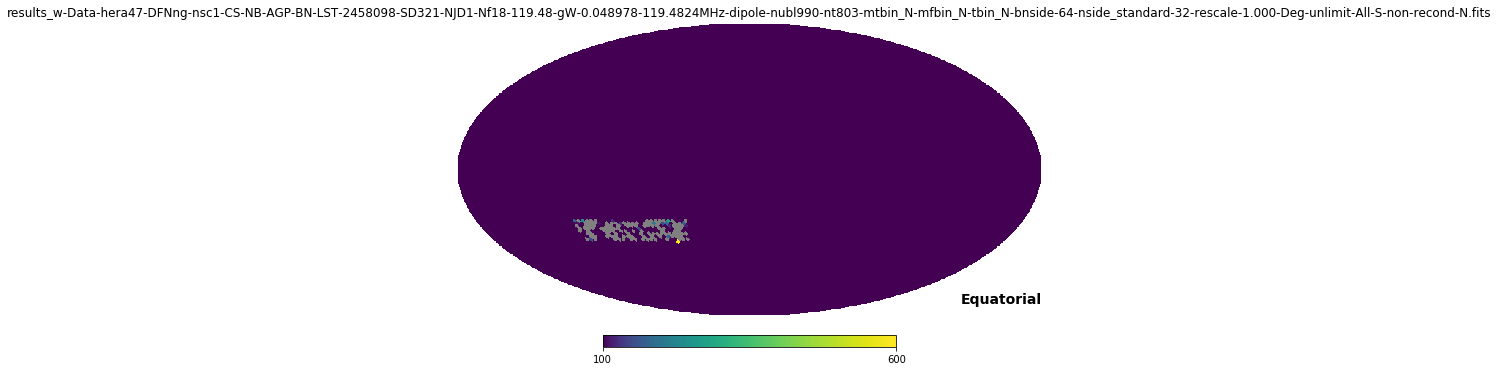

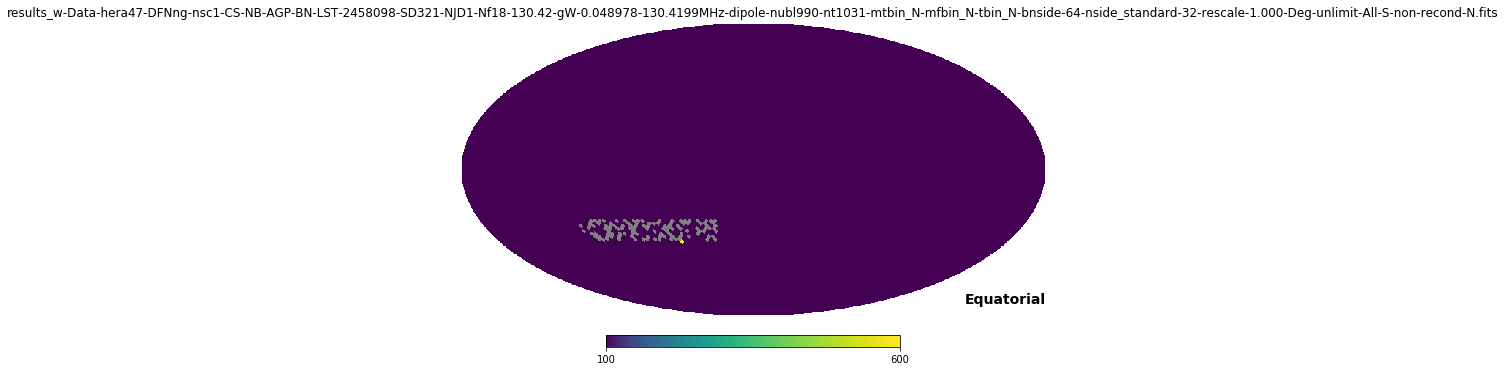

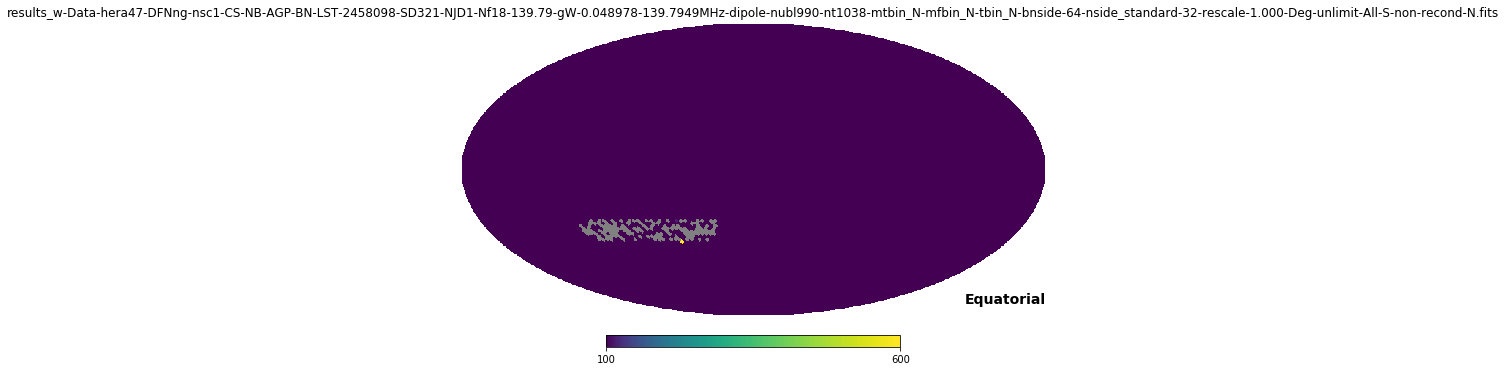

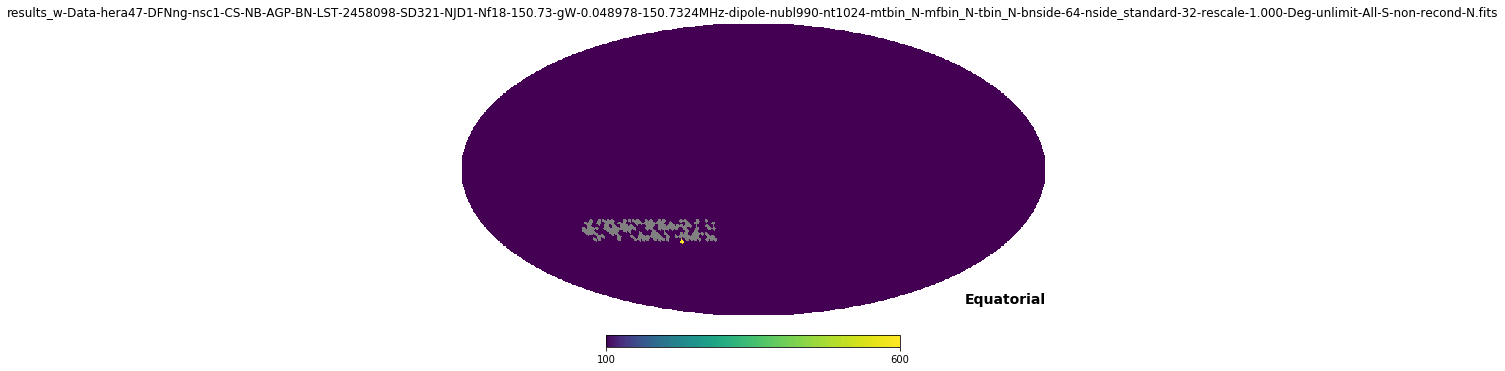

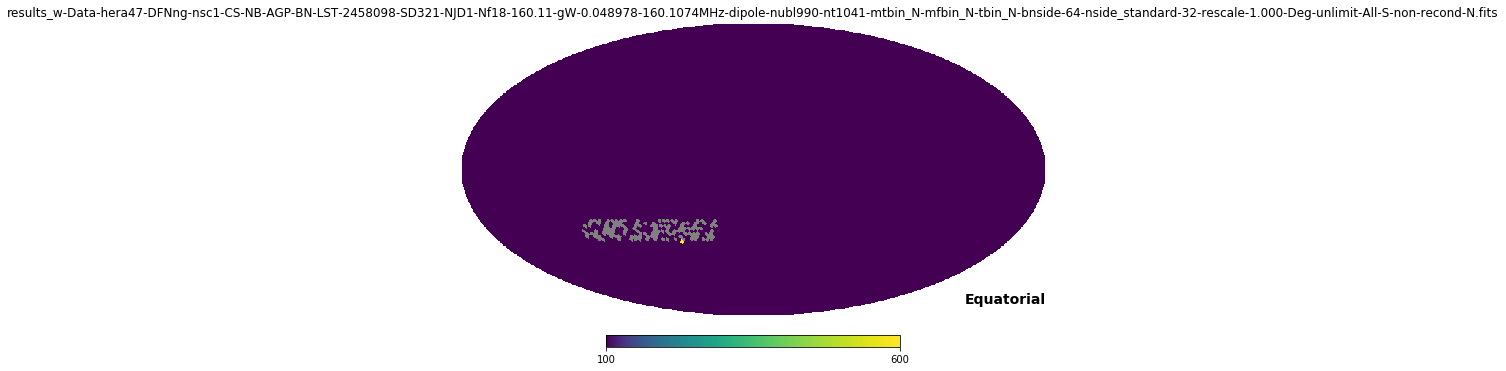

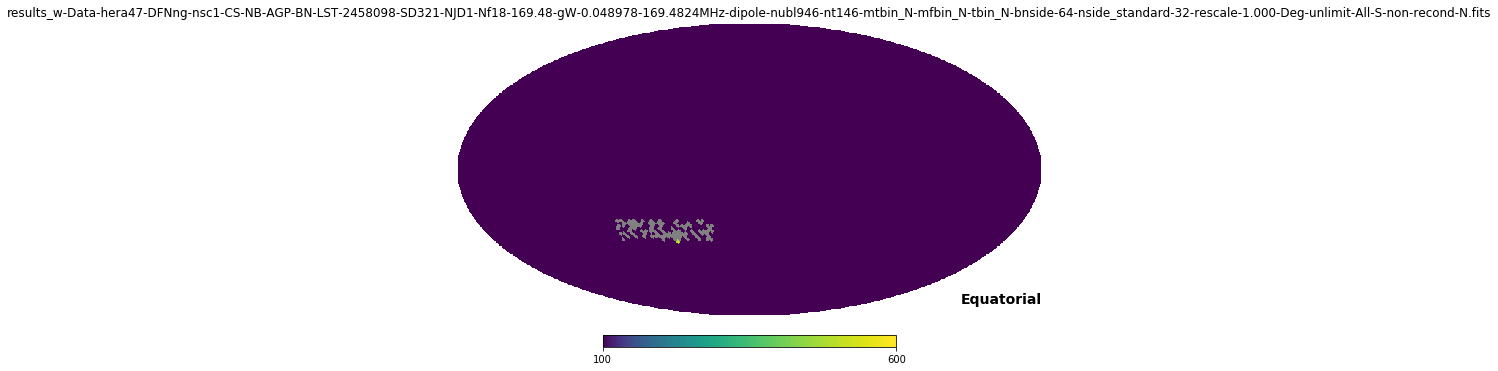

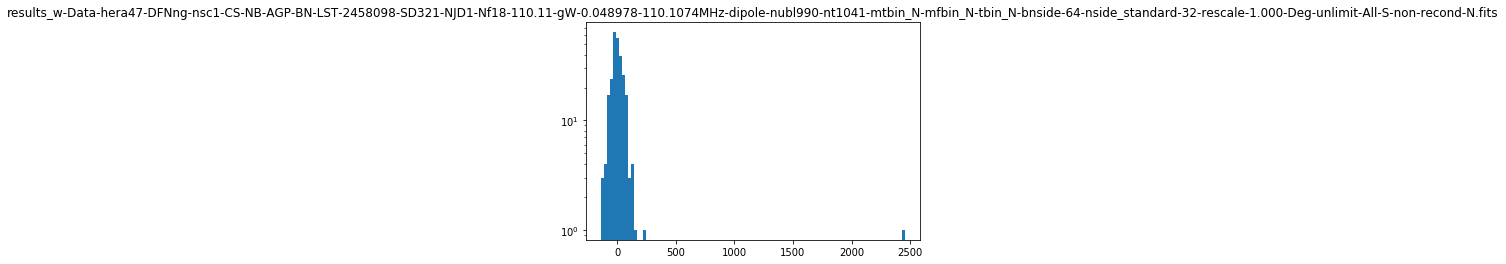

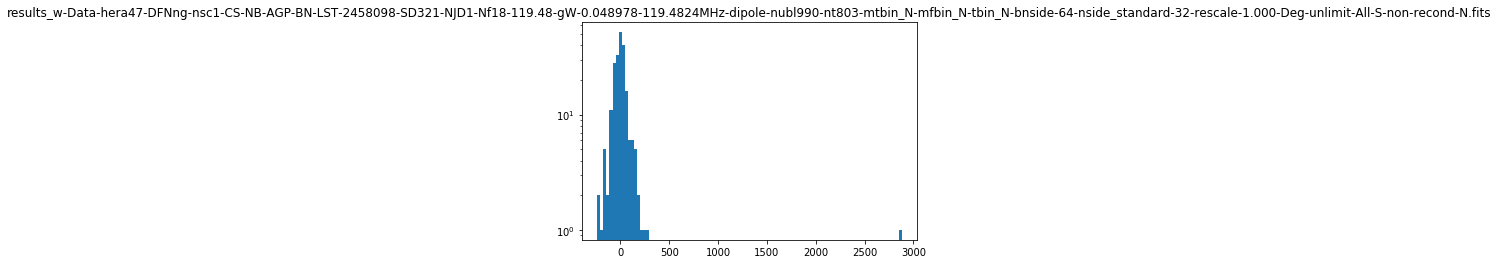

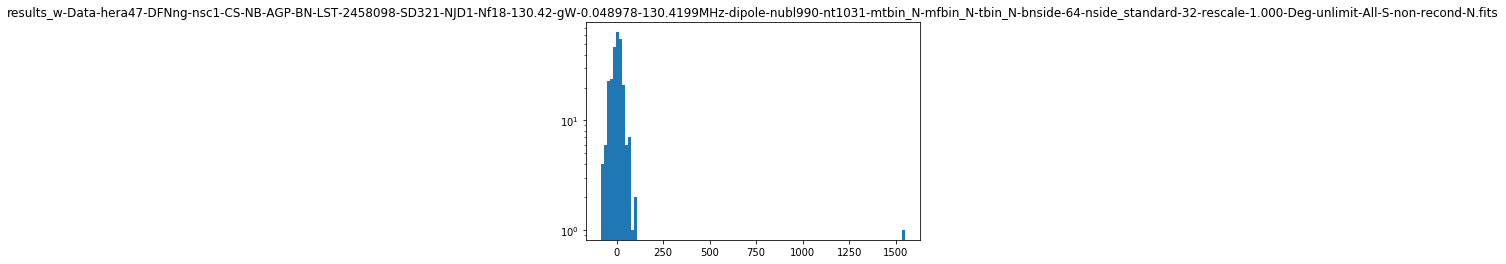

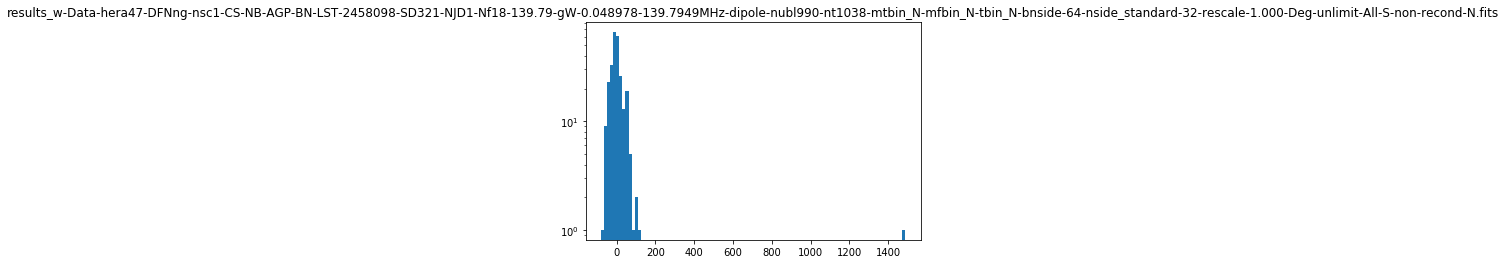

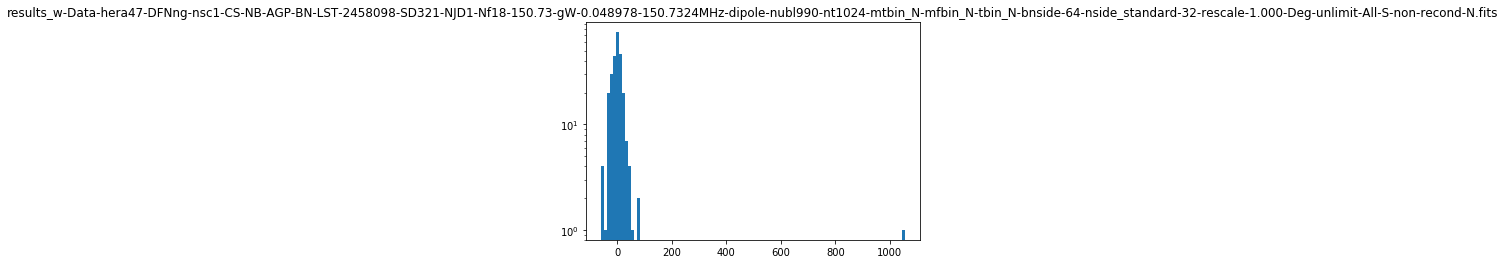

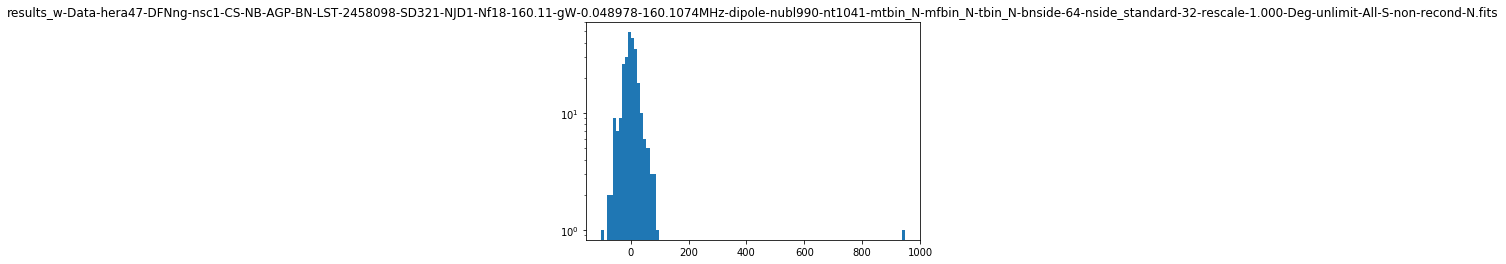

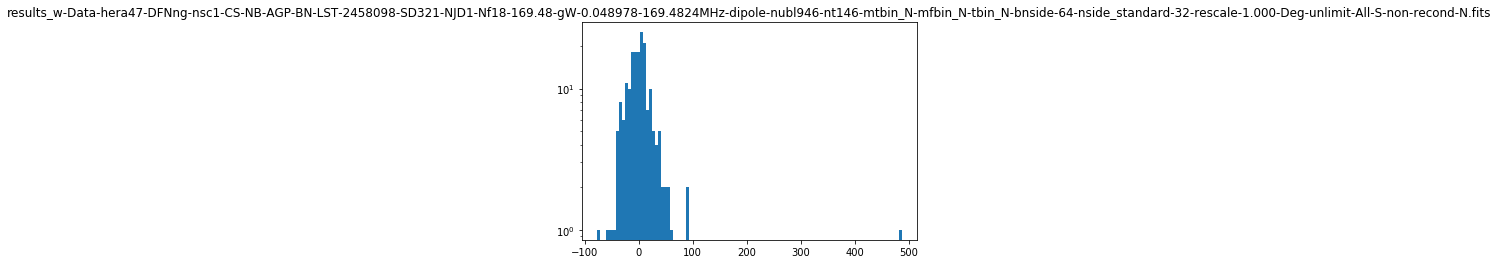

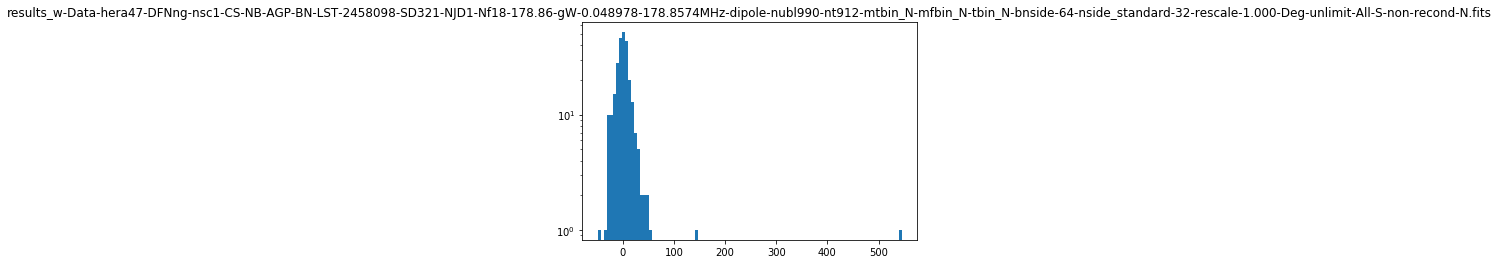

In [92]:
for id_file, fitfile in enumerate(filenames_32_321):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('STD of the Map32-part without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)])))
    plt.figure(15000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(50000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

In [73]:
np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)]), map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)].shape
# np.abs(map_fit).min()

(49.2489617288407, (1670,))

In [126]:
nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_part_32 = fits.getdata(filenames_32_321[7]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_part_32)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_part_32)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_part_32[np.argsort(ww_solution_part_32)[-40:]]))



Bright_Pixels_Data: [[-30.         -32.7971683  -25.94447977 -31.38816646 -25.94447977
  -28.63098984 -25.94447977 -34.22886633 -27.27961274 -25.94447977
  -30.         -34.22886633 -27.27961274 -28.63098984 -27.27961274
  -25.94447977 -27.27961274 -32.7971683  -35.68533471 -30.
  -28.63098984 -32.7971683  -32.7971683  -30.         -28.63098984
  -25.94447977 -28.63098984 -30.         -28.63098984 -31.38816646
  -31.38816646 -32.7971683  -32.7971683  -28.63098984 -32.7971683
  -32.7971683  -25.94447977 -32.7971683  -27.27961274 -25.94447977
  -32.7971683  -34.22886633 -30.         -32.7971683  -35.68533471
  -32.7971683  -30.         -32.7971683  -31.38816646 -34.22886633
  -35.68533471 -31.38816646 -34.22886633 -25.94447977 -31.38816646
  -35.68533471 -32.7971683  -32.7971683  -31.38816646 -32.7971683
  -34.22886633 -30.         -28.63098984 -28.63098984 -28.63098984
  -30.         -28.63098984 -27.27961274 -32.7971683  -34.22886633
  -30.         -32.7971683  -32.7971683  -34.2288663

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1041-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map64-part without Fornax A: 757.510156356
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt803-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map64-part without Fornax A: 918.623924167
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt1031-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map64-part without Fornax A: 535.006105208
(3, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-139.79-gW-0.048978-139.7949MHz-dipole-nubl990-nt1038-mt

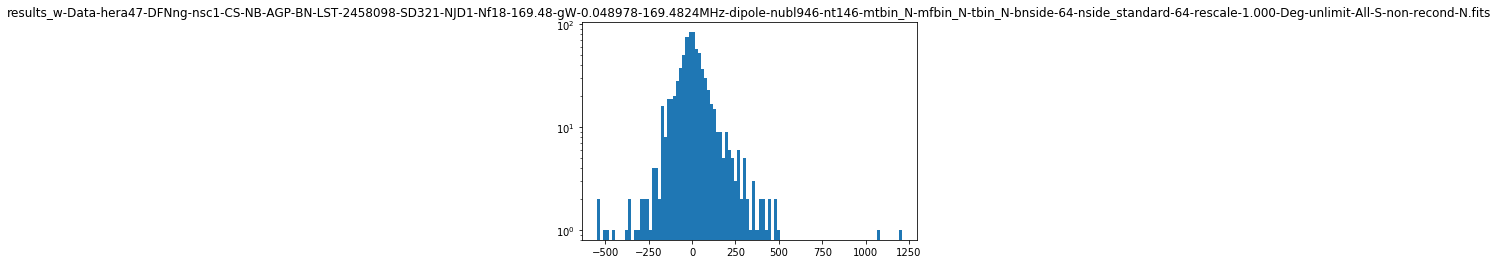

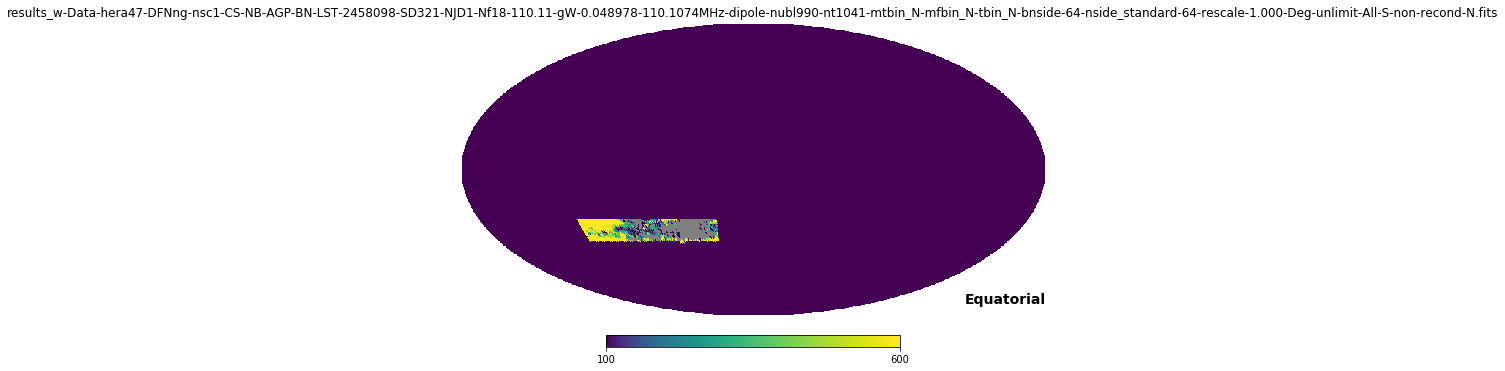

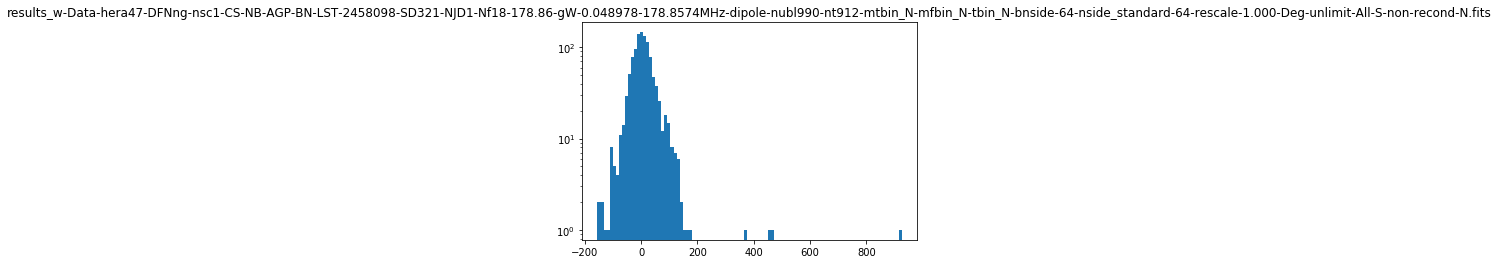

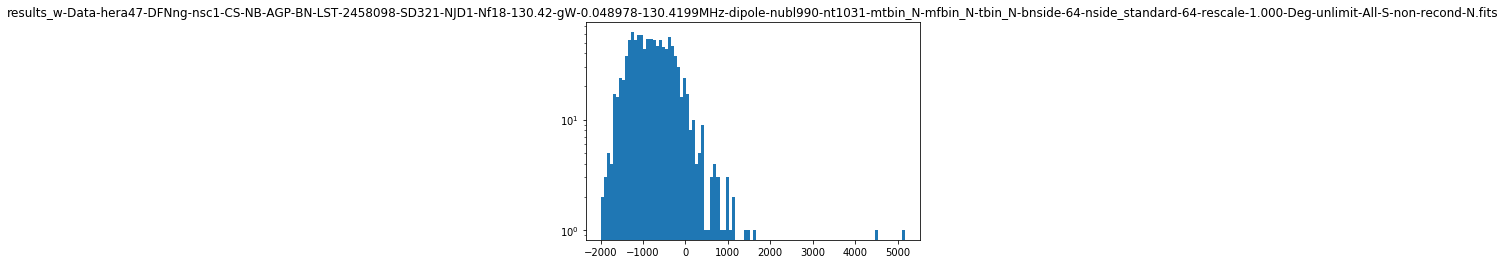

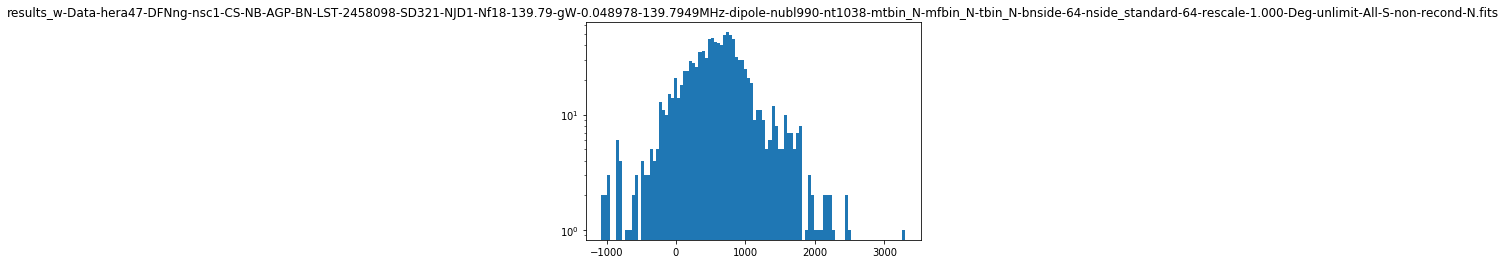

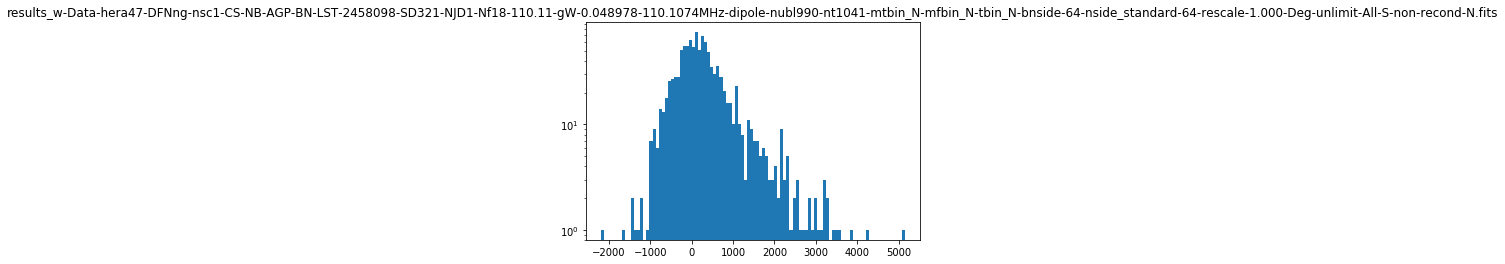

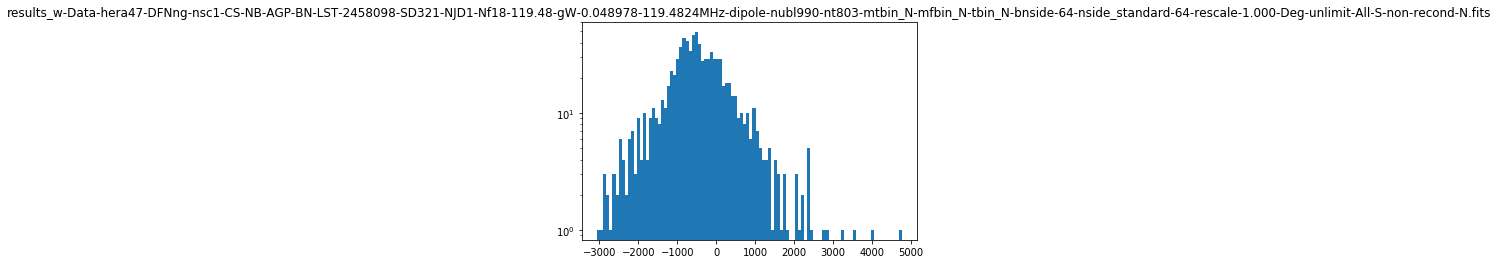

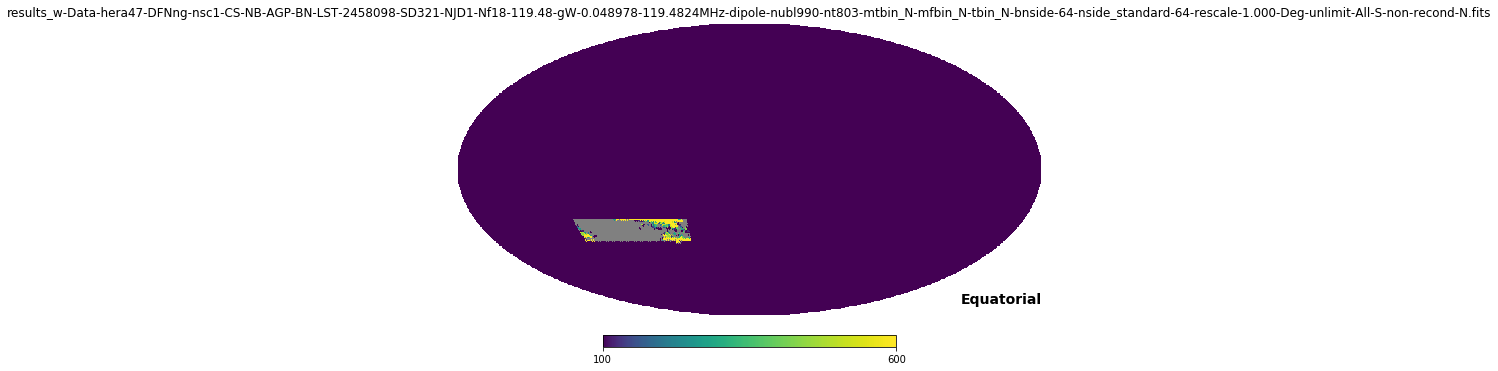

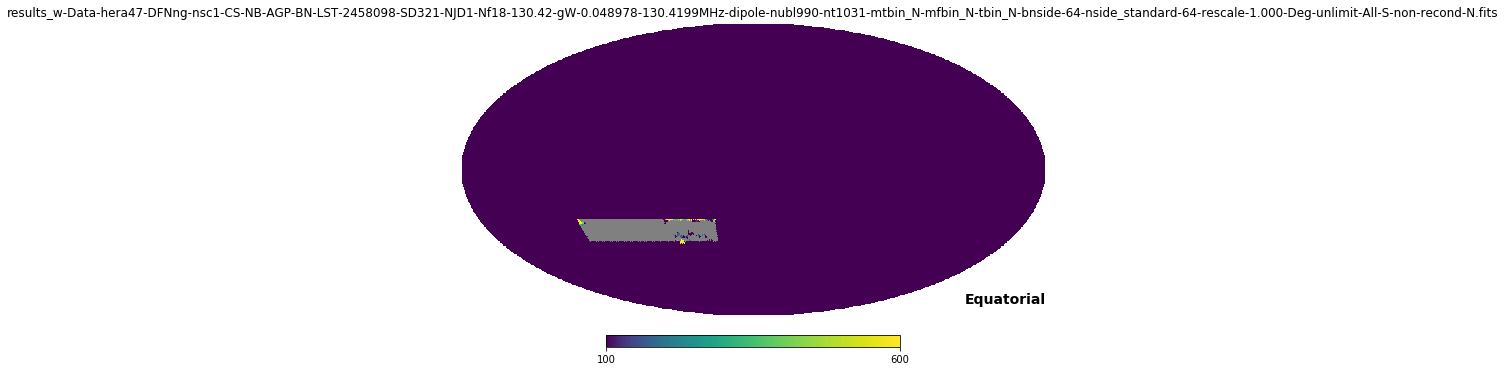

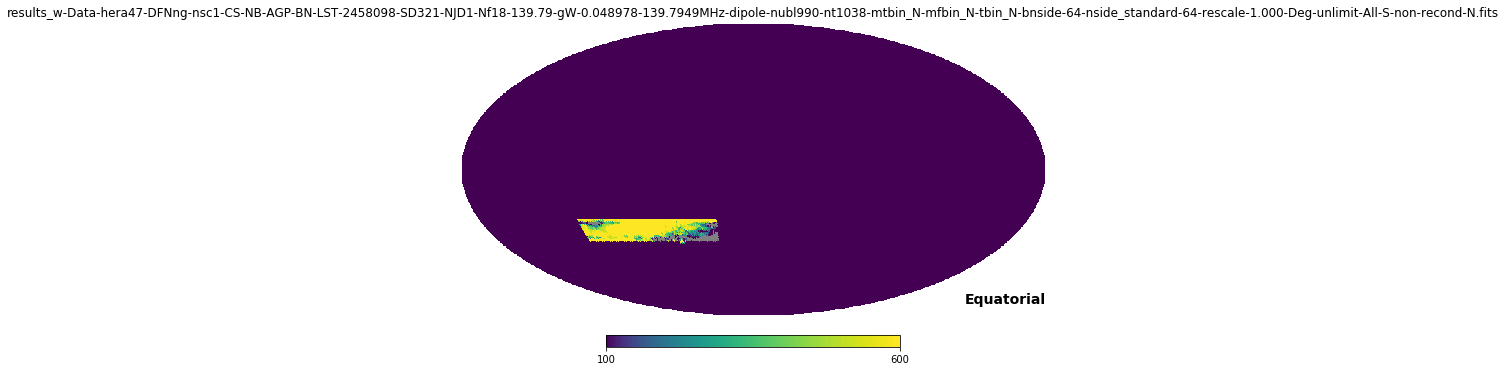

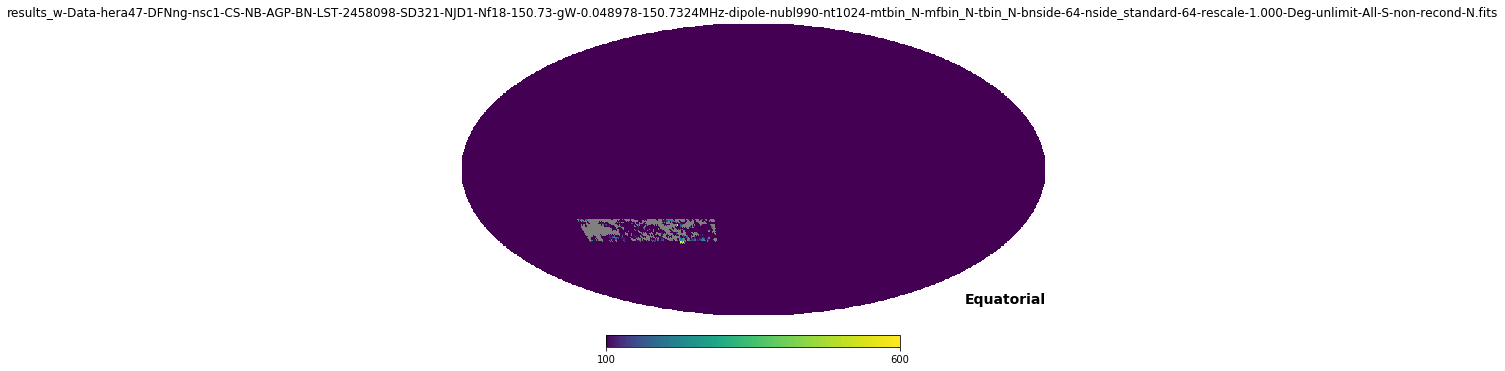

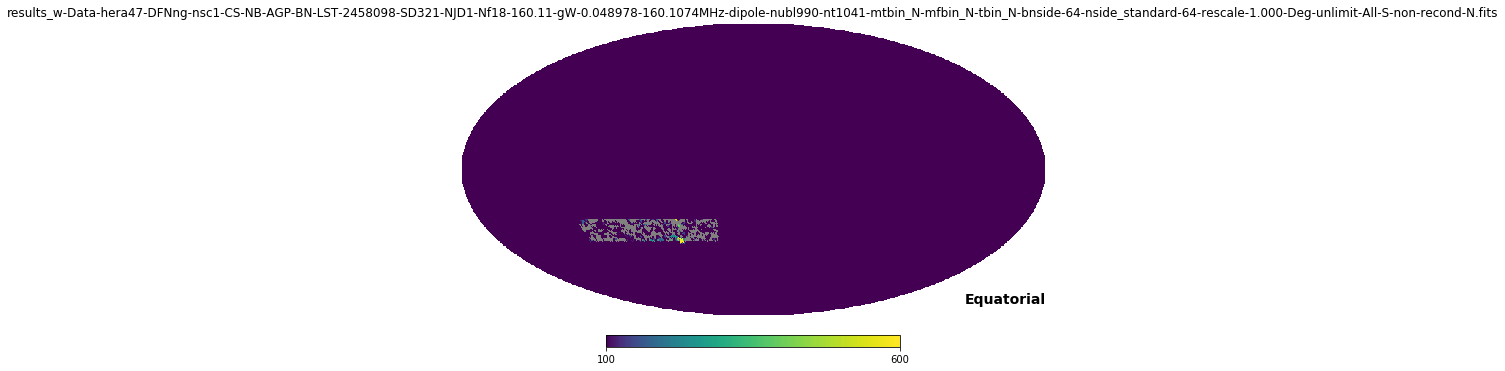

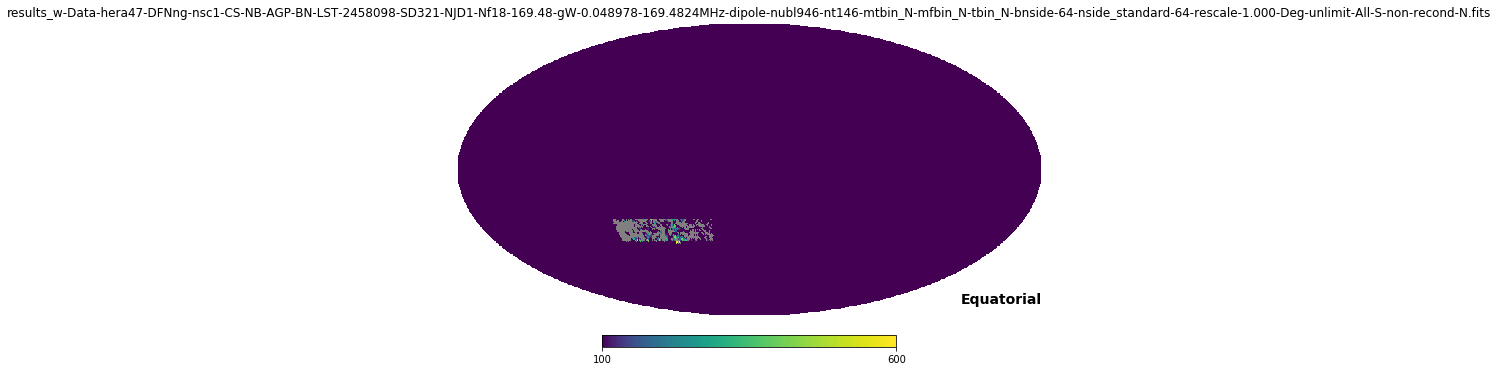

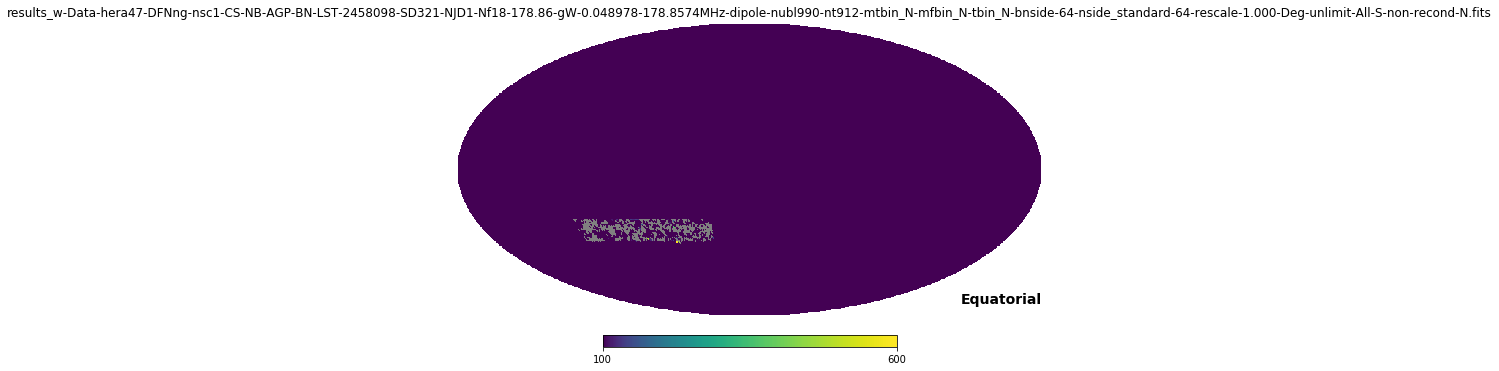

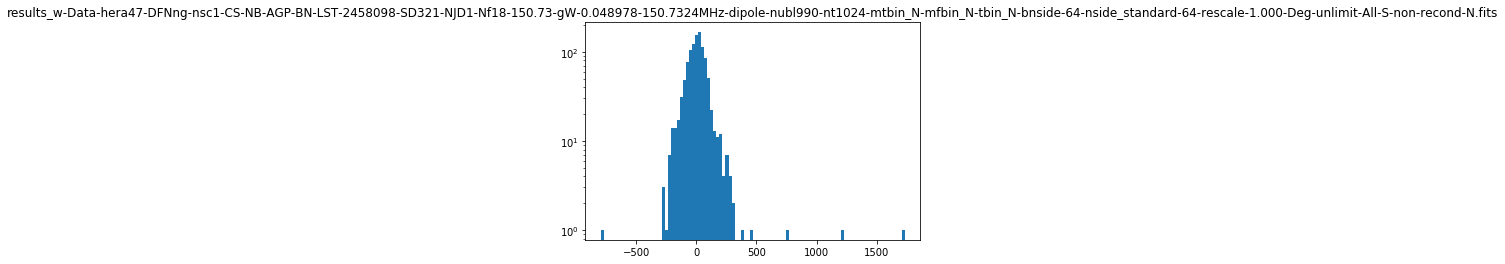

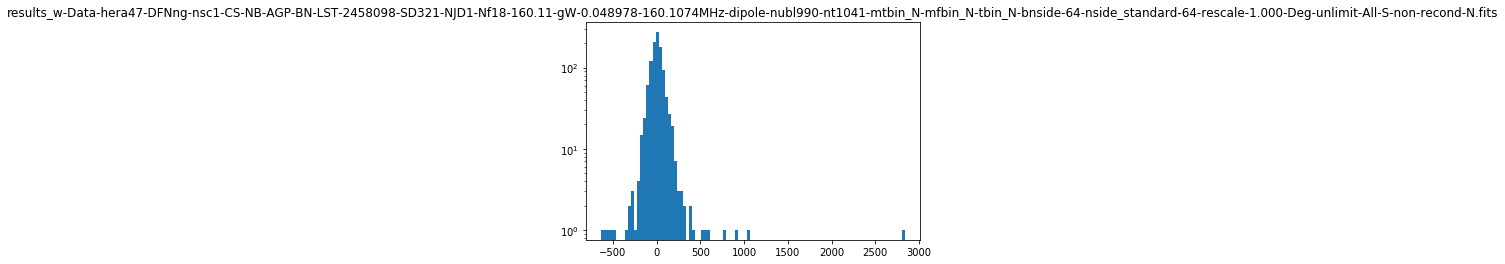

In [91]:
for id_file, fitfile in enumerate(filenames_64_321):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('STD of the Map64-part without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-2]][np.abs(map_fit[np.argsort(map_fit)[:-2]]) > 10**(-5)])))
    plt.figure(150000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(550000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

In [131]:
nside_standard = 64
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_part_64 = fits.getdata(filenames_64_321[4]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_part_64)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_part_64)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_part_64[np.argsort(ww_solution_part_64)[-80:]]))




Bright_Pixels_Data: [[-34.22886633 -35.68533471 -30.69158768 -35.68533471 -34.95386526
  -27.27961274 -32.08995126 -27.27961274 -32.7971683  -35.68533471
  -34.22886633 -34.95386526 -34.22886633 -27.95318688 -28.63098984
  -26.61009781 -35.68533471 -34.95386526 -28.63098984 -27.27961274
  -27.95318688 -34.22886633 -30.         -35.68533471 -25.94447977
  -28.63098984 -34.22886633 -25.94447977 -26.61009781 -34.22886633
  -33.51005607 -33.51005607 -36.42357364 -27.95318688 -25.94447977
  -27.27961274 -29.31319896 -34.22886633 -34.95386526 -27.27961274
  -32.7971683  -34.22886633 -25.28260304 -35.68533471 -29.31319896
  -36.42357364 -35.68533471 -33.51005607 -35.68533471 -32.7971683
  -35.68533471 -29.31319896 -35.68533471 -34.22886633 -34.22886633
  -27.95318688 -34.95386526 -28.63098984 -34.95386526 -25.94447977
  -34.95386526 -36.42357364 -34.95386526 -36.42357364 -25.28260304
  -34.95386526 -25.28260304 -34.95386526 -35.68533471 -27.95318688
  -27.95318688 -36.42357364 -36.42357364 -3

Filename: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard32-Eq.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (12288,)   float64   
Data shape, min, max:  (12288,) 123.393245559361 7350.223968374633
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


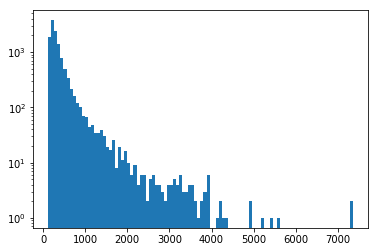

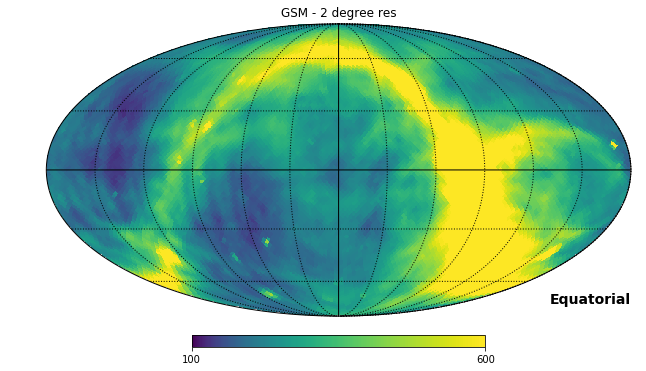

In [11]:
# GSM map with two degrees resolution
GSM32_path = DATA_PATH + '/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard32-Eq.fits'
hdul = fits.open(GSM32_path)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata(GSM32_path)
plt.hist(testmap,bins=100,log=True)
hp.mollview(testmap, title="GSM - 2 degree res", norm='log', min=100, max=600, coord='C', nest=True)
hp.graticule(dmer=30,dpar=30)
hdul.close()

Filename: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard64-Eq.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (49152,)   float64   
Data shape, min, max:  (49152,) 119.61855093973735 12303.866180350538
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


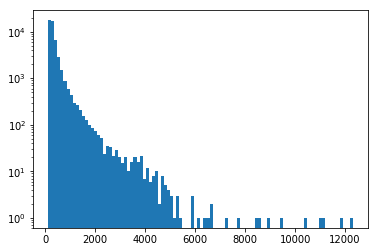

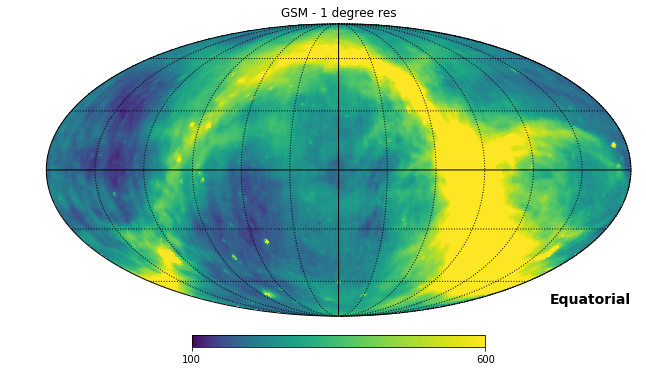

In [13]:
# GSM map with 1 degree resolution
GSM64_path = DATA_PATH + '/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard64-Eq.fits'
hdul = fits.open(GSM64_path)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata(GSM64_path)
plt.hist(testmap,bins=100,log=True)
hp.mollview(testmap, title="GSM - 1 degree res", norm='log', min=100, max=600, coord='C', nest=True)
hp.graticule(dmer=30,dpar=30)
hdul.close()

In [23]:
testmap.max()

0.0

Filename: victor1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (12288,)   float64   
Data shape, min, max:  (12288,) 0.0 525.8055325185119
80.0 160.0 -46.1880215352 46.1880215352
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


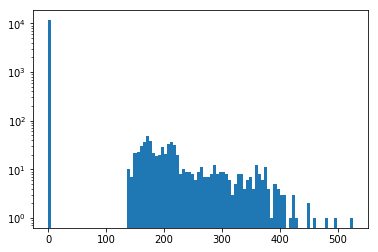

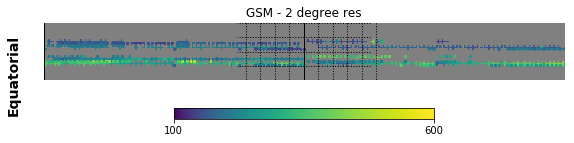

In [6]:
hdul = fits.open('victor1.fits')
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata('victor1.fits')
plt.hist(testmap,bins=100,log=True)
hp.cartview(testmap, title="GSM - 2 degree res", norm='log', min=100, max=600, coord='C', latra=[-50,-10], xsize=360)
hp.graticule(dpar=10,dmer=10)
hdul.close()

Filename: victor2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (49152,)   float64   
Data shape, min, max:  (49152,) 0.0 2307.918425457319
80.0 160.0 -46.1880215352 46.1880215352
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


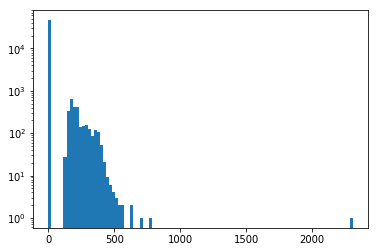

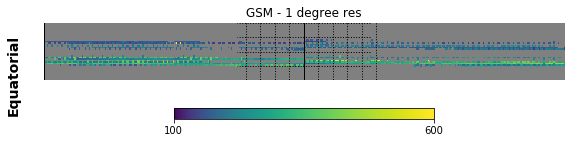

In [7]:
hdul = fits.open('victor2.fits')
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata('victor2.fits')
plt.hist(testmap,bins=100,log=True)
hp.cartview(testmap, title="GSM - 1 degree res", norm='log', min=100, max=600, coord='C', latra=[-50,-10],xsize=360)
hp.graticule(dpar=10,dmer=10)
hdul.close()

In [8]:
datamat = np.zeros(4915200,dtype=float).reshape(49152,100)
print(datamat.shape)
datamat[:,0]=data
datamat[:,1]=data*2

(49152, 100)


Filename: victor3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (12288,)   float64   
Data shape, min, max:  (12288,) -258.2928860142555 972.5690826731519
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


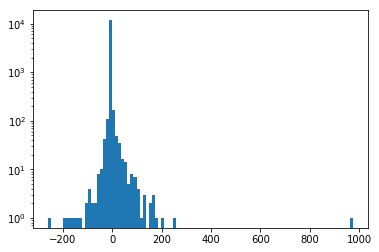

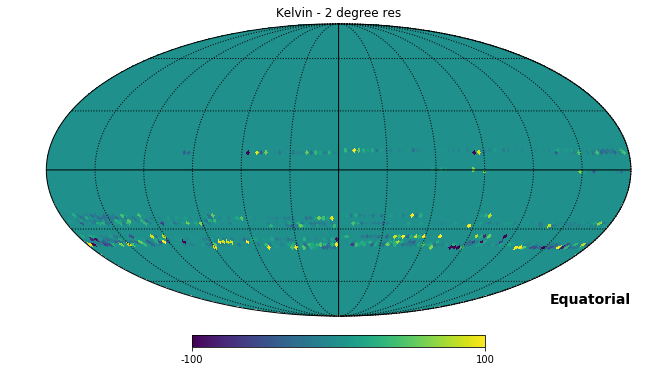

In [13]:
# Data map with two degrees resolution
hdul = fits.open('victor3.fits')
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata('victor3.fits')
plt.hist(testmap,bins=100,log=True)
hp.mollview(testmap, title="Kelvin - 2 degree res", norm='none', min=-100, max=100, coord='C')
hp.graticule(dmer=30,dpar=30)
hdul.close()

Filename: victor4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (49152,)   float64   
Data shape, min, max:  (49152,) -884.4849174103163 2817.529642562779
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


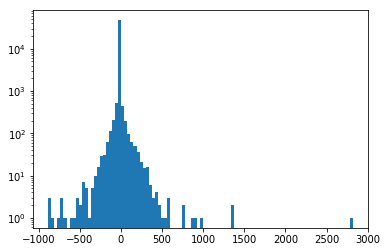

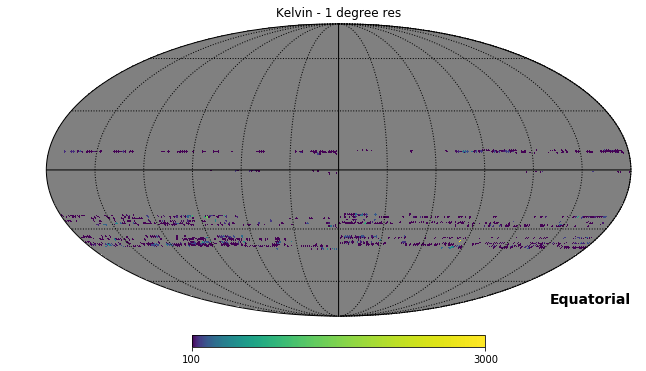

In [10]:
# Data map with one degree resolution
hdul = fits.open('victor4.fits')
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata('victor4.fits')
plt.hist(testmap,bins=100,log=True)
hp.mollview(testmap, title="Kelvin - 1 degree res", norm='log', min=100, max=3000, coord='C')
hp.graticule(dmer=30,dpar=30)
hdul.close()

Filename: victor3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (12288,)   float64   
Data shape, min, max:  (12288,) -258.2928860142555 972.5690826731519
80.0 160.0 -46.1880215352 46.1880215352
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


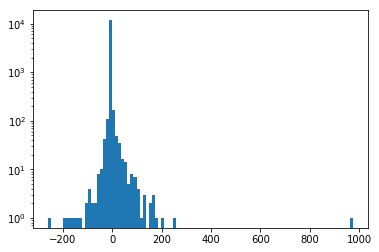

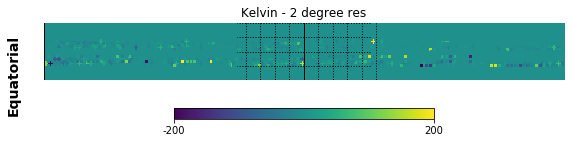

In [11]:
hdul = fits.open('victor3.fits')
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata('victor3.fits')
plt.hist(testmap,bins=100,log=True)
hp.cartview(testmap, title="Kelvin - 2 degree res", norm='none', min=-200, max=200, coord='C', latra=[-50,-10], xsize=360)
hp.graticule(dpar=10,dmer=10)
hdul.close()

Filename: victor4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (49152,)   float64   
Data shape, min, max:  (49152,) -884.4849174103163 2817.529642562779
80.0 160.0 -46.1880215352 46.1880215352
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


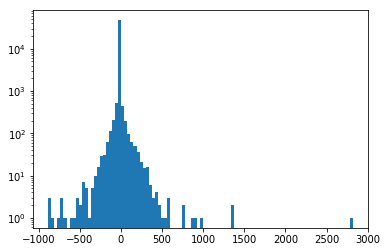

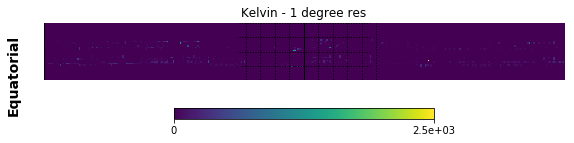

In [12]:
hdul = fits.open('victor4.fits')
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata('victor4.fits')
plt.hist(testmap,bins=100,log=True)
hp.cartview(testmap, title="Kelvin - 1 degree res", norm='none', min=0, max=2500, coord='C', latra=[-50,-10], xsize=360)
hp.graticule(dpar=10,dmer=10)
hdul.close()